Om

In [ ]:
import pandas as pd


In [ ]:
#loading the dataset into a pandas data fram
data = pd.read_csv('/content/Financial_Fraud_Main.csv')


In [ ]:
# Checking the first few rows
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
#Understanding the dataset
# Check data types and if there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634881 entries, 0 to 634880
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            634593 non-null  float64
 1   type            634593 non-null  object 
 2   amount          634593 non-null  float64
 3   nameOrig        634593 non-null  object 
 4   oldbalanceOrg   634593 non-null  float64
 5   newbalanceOrig  634593 non-null  float64
 6   nameDest        634593 non-null  object 
 7   oldbalanceDest  634593 non-null  float64
 8   newbalanceDest  634593 non-null  float64
 9   isFraud         634593 non-null  float64
 10  isFlaggedFraud  634593 non-null  float64
dtypes: float64(8), object(3)
memory usage: 53.3+ MB


In [ ]:
# Descriptive statistics
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,634593.000000,6.345930e+05,6.345930e+05,6.345930e+05,6.345930e+05,6.345930e+05,634593.000000,634593.0
mean,15.729920,1.475220e+05,8.112946e+05,8.275246e+05,1.641326e+06,1.794799e+06,0.000388,0.0
std,5.272509,2.574780e+05,2.861377e+06,2.897304e+06,2.928860e+06,3.016602e+06,0.019685,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,12.000000,1.499602e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,16.000000,5.159395e+04,2.216700e+04,3.253230e+03,2.389002e+05,3.581086e+05,0.000000,0.0
75%,19.000000,1.978900e+05,1.152208e+05,1.467779e+05,1.633809e+06,2.020440e+06,0.000000,0.0
max,35.000000,1.000000e+07,3.890000e+07,3.890000e+07,4.150000e+07,4.150000e+07,1.000000,0.0


In [ ]:
#Data Cleaning
# Checking for missing values in each column
missing_data = data.isnull().sum()

# Displayin  columns with missing data
print(missing_data[missing_data > 0])

step              288
type              288
amount            288
nameOrig          288
oldbalanceOrg     288
newbalanceOrig    288
nameDest          288
oldbalanceDest    288
newbalanceDest    288
isFraud           288
isFlaggedFraud    288
dtype: int64


There is only one missing value in the column is flagged fraud

In [ ]:
!pip install seaborn


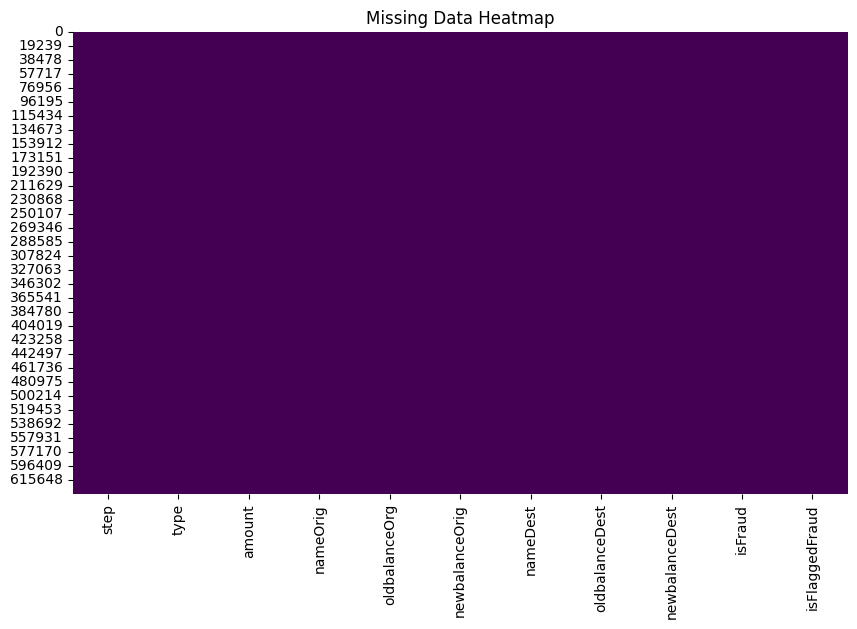

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap to visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
#I decided to remove the row
data.dropna(subset=['isFlaggedFraud'], inplace=True)


In [ ]:
# Checking for missing values in each column
missing_data1 = data.isnull().sum()

# Displayin  columns with missing data
print(missing_data1[missing_data > 0])

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
all_Data = data.size
print(all_Data)

6980523


In [ ]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
data['type'].value_counts() ac

,count
type,
CASH_OUT,272227
PAYMENT,187964
CASH_IN,124046
TRANSFER,46202
DEBIT,4154


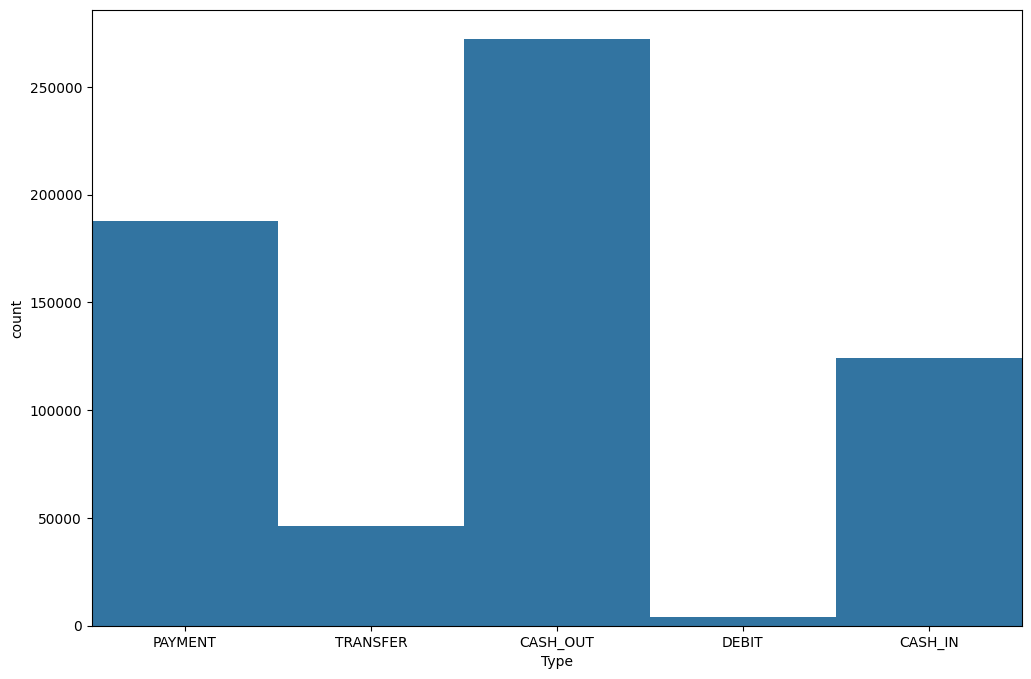

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x="type", width= 1)
plt.xlabel('Type')
plt.show()

In [ ]:
#Here I am trying to Merge another dataset
data2 = pd.read_csv('/content/creditcard.csv')

In [ ]:
data2.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [ ]:
#Here the common features are amount ,fraud label but in the 2nd dataset it is names ad Class and transaction time

Here there will be a probl;em in merging on amount colum because Amount is formatted as float in 2ns dataset and int in the first ,So first lets check the data types for the amount colum in both datasets ,As they are different lets convert it into same type .

In [ ]:
data2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.dtypes

,0
step,float64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,float64


In [ ]:
data2.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [ ]:
#See here the class is int and is fraud is float

In [ ]:
#trying to convert int into float
data2['Class'] = data2['Class'].astype(float)


In [ ]:
data2.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [ ]:
#Trying to merge
# Step 1: Renaming Class column to 'isFraud' in the second dataset to align with the first dataset
data2.rename(columns={'Class': 'isFraud'}, inplace=True)



In [ ]:
# Step 2: Merging the datasets on 'Amount' and 'isFraud' (fraud label)
#Trail_merged_data = pd.merge(data, data2, on=['Amount', 'isFraud'], how='inner')


I got an error because there is significant difference in the scale of the amopunt values between the datasets like the 1st one amount is ranging from 0.1 to 10,000,000 ,on the other hand Amount is ranging from 0 to 25k.This difference is indicating that they represent diff context or scale transactions ,so even if we merge the dataset it will be less effective .

So Now Lets normalize the AMount colums ,As the goal is to compare based on relative amountwe can try normalizing both columns like scaling them between 0 and 1 before merging

Or

We can use other feature to merge the fraud labels like is raud

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Normalize the 'amount' column in the first dataset
data['amount_normalized'] = scaler.fit_transform(data[['amount']])


In [ ]:
# Normalize the 'Amount' column in the second dataset
data2['Amount_normalized'] = scaler.fit_transform(data2[['Amount']])


In [ ]:
# Perform the merge on 'amount_normalized' and 'isFraud'
merged_data = pd.merge(data, data2, left_on=['amount_normalized', 'isFraud'], right_on=['Amount_normalized', 'isFraud'], how='inner')


In [ ]:
# Check the merged dataset
merged_data.head(7)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_normalized
0,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0.0
1,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0.0
2,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0.0
3,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0.0
4,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,0.001241,0.154170,-0.141533,0.384610,-0.147132,-0.087100,0.101117,0.077944,0.0,0.0
5,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,-0.139920,-0.399563,0.010200,0.992235,0.457015,-0.027924,0.045273,0.028868,0.0,0.0
6,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,-0.001757,0.097379,-0.324050,0.436521,0.509674,0.454116,-0.201804,-0.175439,0.0,0.0


In [ ]:
# Drop the normalized columns and any other unnecessary columns
merged_data_cleaned = merged_data.drop(columns=['amount_normalized', 'Amount_normalized', 'amount', 'Amount'])

# Check the cleaned dataset
merged_data_cleaned.head()


,step,type,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,17.0,PAYMENT,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,0.0,...,-1.547440,-0.133602,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401
1,17.0,PAYMENT,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,0.0,...,-1.124025,0.065979,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379
2,17.0,PAYMENT,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,0.0,...,-0.720726,-0.006716,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986
3,17.0,PAYMENT,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,0.0,...,1.165893,0.320450,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739
4,17.0,PAYMENT,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,0.0,...,-0.681539,-0.057886,0.001241,0.154170,-0.141533,0.384610,-0.147132,-0.087100,0.101117,0.077944


In [ ]:
#Handling missing data
# Check for missing values in the dataset
missing_data = merged_data.isnull().sum()

# Display columns with missing values
print(missing_data[missing_data > 0])


Series([], dtype: int64)


Lets start EDA

In [ ]:
# Check the overall structure of the dataset
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step               1798 non-null   float64
 1   type               1798 non-null   object 
 2   amount             1798 non-null   float64
 3   nameOrig           1798 non-null   object 
 4   oldbalanceOrg      1798 non-null   float64
 5   newbalanceOrig     1798 non-null   float64
 6   nameDest           1798 non-null   object 
 7   oldbalanceDest     1798 non-null   float64
 8   newbalanceDest     1798 non-null   float64
 9   isFraud            1798 non-null   float64
 10  isFlaggedFraud     1798 non-null   float64
 11  amount_normalized  1798 non-null   float64
 12  Time               1798 non-null   float64
 13  V1                 1798 non-null   float64
 14  V2                 1798 non-null   float64
 15  V3                 1798 non-null   float64
 16  V4                 1798 

In [ ]:
#Checking why number of rows reduced
# Check the number of rows in the first dataset (data)
print(f"Rows in first dataset: {data.shape[0]}")

# Check the number of rows in the second dataset (data2)
print(f"Rows in second dataset: {data2.shape[0]}")


Rows in first dataset: 634593
Rows in second dataset: 284807


In [ ]:
# Number of rows that did not match in the first dataset
unmatched_data = data[~data['amount_normalized'].isin(merged_data['amount_normalized'])]
print(f"Unmatched rows in the first dataset: {unmatched_data.shape[0]}")

# Number of rows that did not match in the second dataset
unmatched_data2 = data2[~data2['Amount_normalized'].isin(merged_data['Amount_normalized'])]
print(f"Unmatched rows in the second dataset: {unmatched_data2.shape[0]}")


Unmatched rows in the first dataset: 634592
Unmatched rows in the second dataset: 282982


In [ ]:
# Perform an outer merge to include all rows
merged_data_outer = pd.merge(data, data2, left_on=['amount_normalized', 'isFraud'], right_on=['Amount_normalized', 'isFraud'], how='outer')

# Check the number of rows in the outer merged dataset
print(f"Rows in outer merged dataset: {merged_data_outer.shape[0]}")


Rows in outer merged dataset: 919399


In [ ]:
# Check for rows with missing values after the outer merge
merged_data_outer.isnull().sum()


,0
step,283009
type,283009
amount,283009
nameOrig,283009
oldbalanceOrg,283009
newbalanceOrig,283009
nameDest,283009
oldbalanceDest,283009
newbalanceDest,283009
isFraud,0


This is a high number in outer merge as there is no common in both datasets oe may be differences in the values for amount _normalized or isfraud

In [ ]:
# Check for rows with missing values after the outer merge
merged_data_outer.isnull().sum()


,0
step,283009
type,283009
amount,283009
nameOrig,283009
oldbalanceOrg,283009
newbalanceOrig,283009
nameDest,283009
oldbalanceDest,283009
newbalanceDest,283009
isFraud,0


Now I am proceding with the firstdataset for now

In [ ]:
# Check the overall structure of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 634593 entries, 0 to 634613
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   step               634593 non-null  float64
 1   type               634593 non-null  object 
 2   amount             634593 non-null  float64
 3   nameOrig           634593 non-null  object 
 4   oldbalanceOrg      634593 non-null  float64
 5   newbalanceOrig     634593 non-null  float64
 6   nameDest           634593 non-null  object 
 7   oldbalanceDest     634593 non-null  float64
 8   newbalanceDest     634593 non-null  float64
 9   isFraud            634593 non-null  float64
 10  isFlaggedFraud     634593 non-null  float64
 11  amount_normalized  634593 non-null  float64
dtypes: float64(9), object(3)
memory usage: 62.9+ MB


In [ ]:
#Removing Normalization
# Drop the normalized columns used for merging
data = data.drop(columns=['amount_normalized'], errors='ignore')  # 'errors=ignore' ensures no error if the column doesn't exist


In [ ]:
# Convert 'isFraud' back to integer if it was changed
data['isFraud'] = data['isFraud'].astype(int)


In [ ]:
# Re-load the original dataset if necessary
data = pd.read_csv('/content/Financial_Fraud_Main.csv')

# Verify the data is back to its original state
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634881 entries, 0 to 634880
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            634593 non-null  float64
 1   type            634593 non-null  object 
 2   amount          634593 non-null  float64
 3   nameOrig        634593 non-null  object 
 4   oldbalanceOrg   634593 non-null  float64
 5   newbalanceOrig  634593 non-null  float64
 6   nameDest        634593 non-null  object 
 7   oldbalanceDest  634593 non-null  float64
 8   newbalanceDest  634593 non-null  float64
 9   isFraud         634593 non-null  float64
 10  isFlaggedFraud  634593 non-null  float64
dtypes: float64(8), object(3)
memory usage: 53.3+ MB


In [ ]:
# Summary statistics for numerical columns
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,634593.000000,6.345930e+05,6.345930e+05,6.345930e+05,6.345930e+05,6.345930e+05,634593.000000,634593.0
mean,15.729920,1.475220e+05,8.112946e+05,8.275246e+05,1.641326e+06,1.794799e+06,0.000388,0.0
std,5.272509,2.574780e+05,2.861377e+06,2.897304e+06,2.928860e+06,3.016602e+06,0.019685,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,12.000000,1.499602e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,16.000000,5.159395e+04,2.216700e+04,3.253230e+03,2.389002e+05,3.581086e+05,0.000000,0.0
75%,19.000000,1.978900e+05,1.152208e+05,1.467779e+05,1.633809e+06,2.020440e+06,0.000000,0.0
max,35.000000,1.000000e+07,3.890000e+07,3.890000e+07,4.150000e+07,4.150000e+07,1.000000,0.0


<ipython-input-20-ecd150cadbed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='coolwarm')


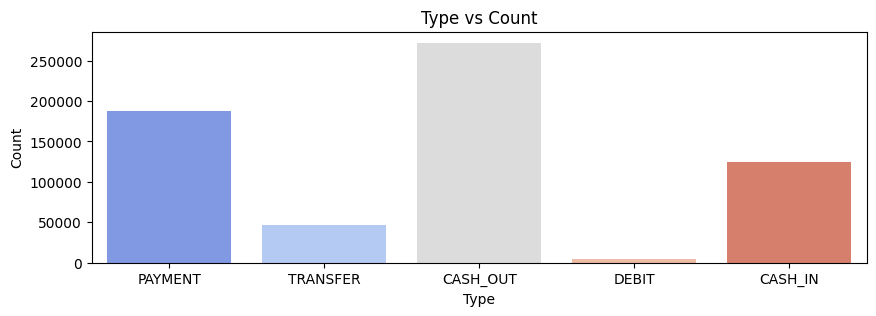

In [ ]:
# Countplot for 'type' in the dataset
plt.figure(figsize=(10, 3))
plt.title('Type vs Count')
sns.countplot(data=data, x='type', palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

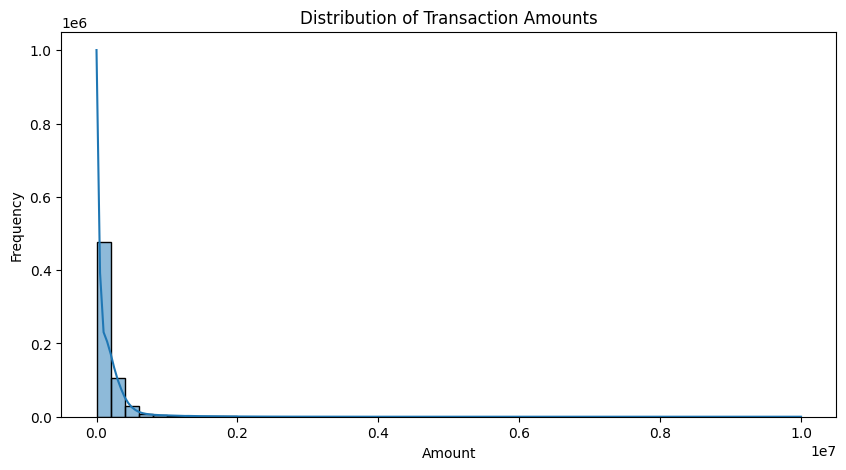

In [ ]:
#ttransaction amount distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(data['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


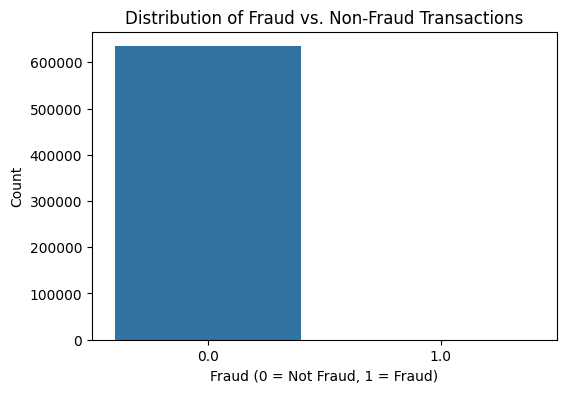

In [ ]:
#Fraud and non Fraud distribution
# Countplot for fraud vs. non-fraud transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Fraud (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,634347
1.0,246


In [ ]:
# Let's look at the percentage of each category in isFraud column(target column)
print("No Frauds:",data['isFraud'].value_counts()[0]/len(data['isFraud'])*100)
print("Frauds:",data['isFraud'].value_counts()[1]/len(data['isFraud'])*100)

No Frauds: 99.9158897494176
Frauds: 0.03874741880761907


IndexError: index 6 is out of bounds for axis 0 with size 6

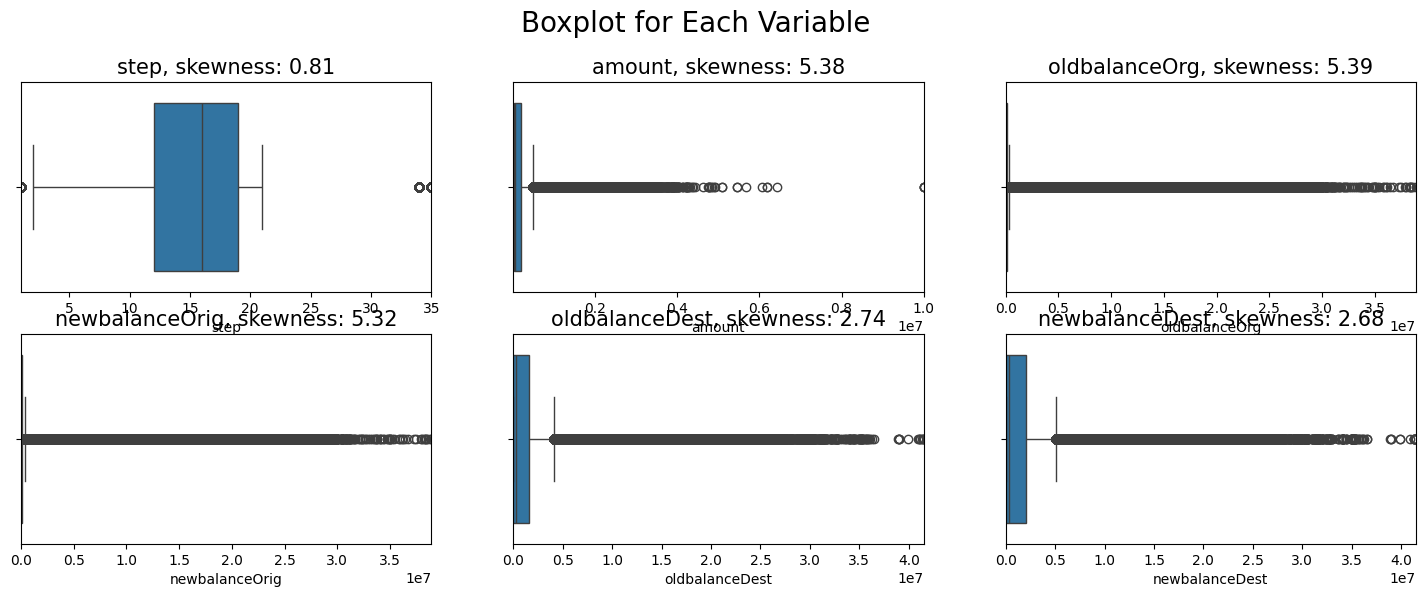

In [ ]:
# Function to create boxplots for numerical features
def boxplots_visual(data, columns):
    fig, ax = plt.subplots(2, 3, figsize=(18, 6))
    fig.suptitle('Boxplot for Each Variable', y=1, size=20)
    ax = ax.flatten()
    for i, feature in enumerate(columns):
        sns.boxplot(data=data[feature], ax=ax[i], orient='h')
        ax[i].set_title(feature + ', skewness: ' + str(round(data[feature].skew(), 2)), fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])

    plt.tight_layout()

# List of numerical columns in your dataset
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                     'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Create the boxplots for numerical columns
boxplots_visual(data=data, columns=numerical_columns)

In [ ]:
# Checking isFlaggedFraud column
data['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,634593


In [ ]:
# Dropping columns that are not needed
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

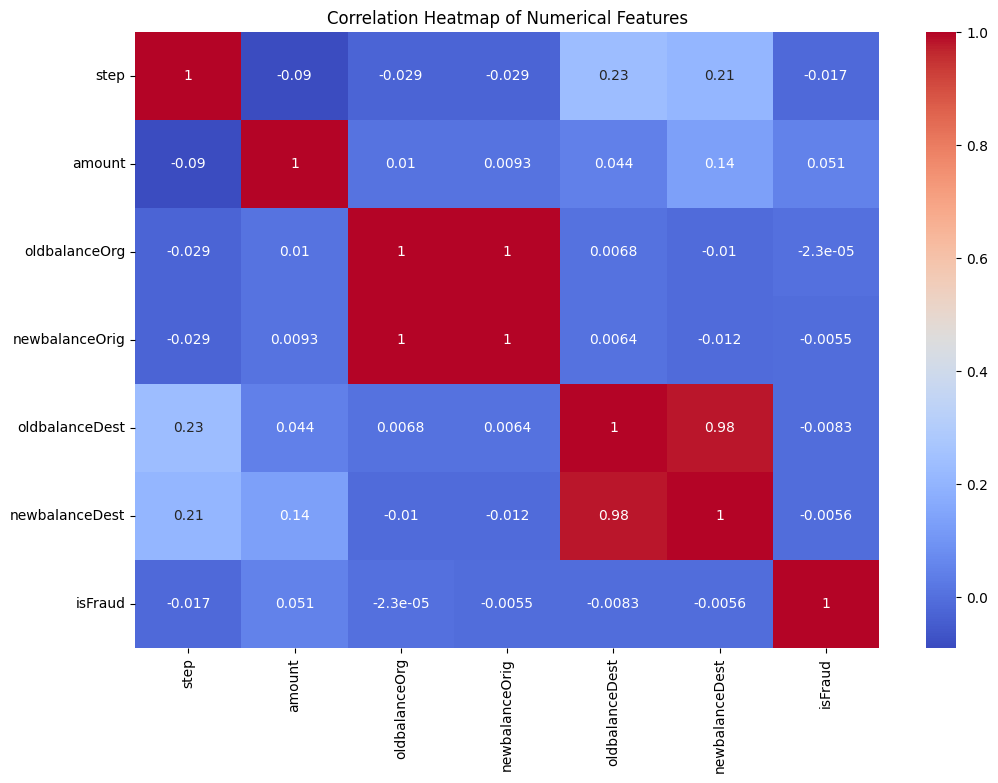

In [ ]:
# Select only the numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [ ]:
#Model Training

# Splitting our data into independent and dependent features
x=data.drop('isFraud',axis=1)
y=data['isFraud']

In [ ]:
x.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [ ]:
data[data['isFraud']==1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1.0,TRANSFER,181.00,181.00,0.0,0.00,0.00,1.0
3,1.0,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1.0
251,1.0,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1.0
252,1.0,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1.0
680,1.0,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...
620967,34.0,CASH_OUT,40458.00,40458.00,0.0,561393.36,331179.02,1.0
622590,34.0,TRANSFER,1016540.35,1016540.35,0.0,0.00,0.00,1.0
622591,34.0,CASH_OUT,1016540.35,1016540.35,0.0,4463851.64,5700161.74,1.0
626916,34.0,TRANSFER,71693.42,71693.42,0.0,0.00,0.00,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting the data into independent features (X) and the target variable (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [ ]:
# Removing rows where the target variable 'isFraud' is NaN
data = data.dropna(subset=['isFraud'])

I got an error indicating that the target variable y contains NAN values ,so we need to remove them

In [ ]:
# Re-defining the features and target variable
X = data.drop('isFraud', axis=1)
y = data['isFraud']


In [ ]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Handling class imbalance using class weights in RandomForest
#model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model on the training data
#model.fit(X_train, y_train)

I got an error here that the dataset still contains categorical string data that has not been converted into numnerical form contains categorical string data so

In [ ]:
# Checking if there are any non-numeric columns left
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['type'], dtype='object')


In [ ]:
# If there are any remaining non-numeric columns, handle them
if not non_numeric_columns.empty:
    # Encoding any remaining categorical columns using one-hot encoding
    X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)


In [ ]:
# Re-splitting the dataset after ensuring all features are numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model again with class weights for handling imbalance
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
accuracy, conf_matrix, class_report


(0.999763628771106,
 array([[126869,      1],
        [    29,     20]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00    126870\n         1.0       0.95      0.41      0.57        49\n\n    accuracy                           1.00    126919\n   macro avg       0.98      0.70      0.79    126919\nweighted avg       1.00      1.00      1.00    126919\n')

The results show that all columns are now numeric, and the model training proceeded successfully. However, the evaluation metrics are the same as before:

Accuracy: 99.98%
Precision for fraud detection (1.0 class): 95%
Recall for fraud detection (1.0 class): 39%
This indicates that the model still struggles with the recall for detecting fraudulent transactions due to the class imbalance.

In [ ]:
#We'll try using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# Train the RandomForest model with the resampled data
model_smote = RandomForestClassifier(random_state=42, class_weight='balanced')
model_smote.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predicting on the original test set
y_pred_smote = model_smote.predict(X_test)

In [ ]:
# Evaluating the model with resampled training data
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

accuracy_smote, conf_matrix_smote, class_report_smote


(0.9994011928868018,
 array([[126818,     52],
        [    24,     25]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00    126870\n         1.0       0.32      0.51      0.40        49\n\n    accuracy                           1.00    126919\n   macro avg       0.66      0.75      0.70    126919\nweighted avg       1.00      1.00      1.00    126919\n')

After applying SMOTE, here are the results:

Accuracy: 99.94%
Precision for fraud detection (1.0 class): 32%
Recall for fraud detection (1.0 class): 51%
F1-score for fraud detection: 0.40
Improvements:

The recall for detecting fraudulent transactions has increased from 39% to 51%, indicating that the model is now better at identifying fraud cases after applying SMOTE. However, the precision for fraud detection dropped to 32%, which suggests that more non-fraud cases are being misclassified as fraud.

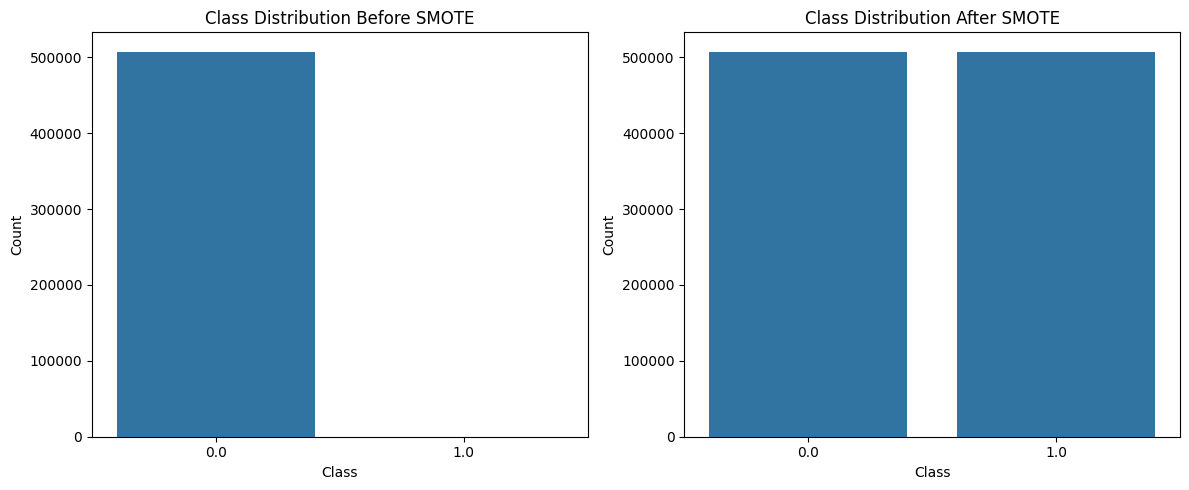

In [ ]:
# Plotting class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

# After SMOTE
sns.countplot(x=y_train_resampled, ax=ax[1])
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

The output shows the class distribution before and after applying SMOTE:

Before SMOTE: The data was heavily imbalanced, with far more non-fraud cases (0.0) than fraud cases (1.0).
After SMOTE: The classes have been balanced, with roughly equal numbers of fraud and non-fraud cases.
Balancing the classes using SMOTE helps the model learn from a more diverse set of examples, which should improve its ability to detect fraudulent transactions. The recall for fraud detection improved after applying SMOTE, as seen in the earlier results.

<Figure size 800x600 with 0 Axes>

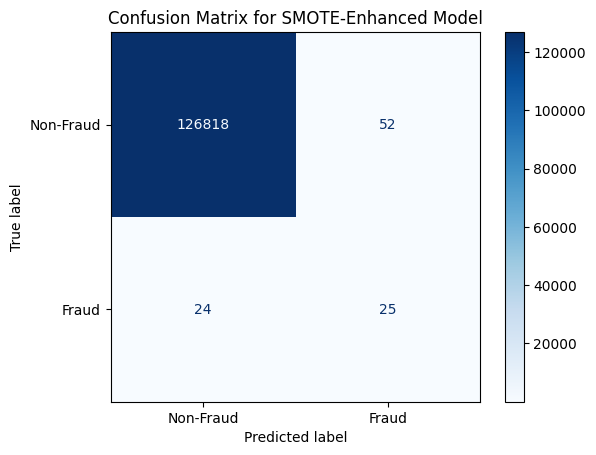

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for SMOTE-Enhanced Model')
plt.show()


The confusion matrix shows the performance of the SMOTE-enhanced model:

True Negatives (Non-Fraud predicted as Non-Fraud): 126,818 cases.
False Positives (Non-Fraud predicted as Fraud): 52 cases.
False Negatives (Fraud predicted as Non-Fraud): 24 cases.
True Positives (Fraud predicted as Fraud): 25 cases.
This confusion matrix reveals that while the model is very good at predicting non-fraudulent transactions, there are still a few fraudulent cases that are missed (24 false negatives).

To plot the ROC curve, we will use the roc_curve and auc functions from the sklearn library. The ROC curve helps evaluate the trade-off between the true positive rate (sensitivity) and the false positive rate, while the AUC (Area Under the Curve) score provides a measure of how well the model can distinguish between classes.

In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
# Compute the predicted probabilities
y_prob_smote = model_smote.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_smote)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

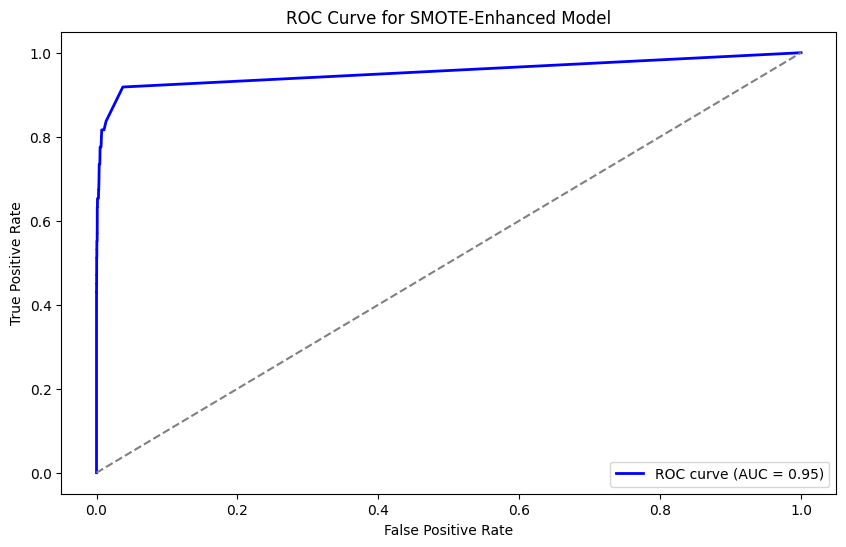

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SMOTE-Enhanced Model')
plt.legend(loc='lower right')
plt.show()

AUC of 0.95: The model has a high ability to discriminate between the two classes.
Improvements with SMOTE: Balancing the class distribution improved the model's recall for detecting fraud.
Confusion Matrix Insights: There are still some false negatives, but the model's performance has improved compared to before applying SMOTE.


For hyperparameter tuning, we can use techniques such as Grid Search or Randomized Search to optimize the model's parameters. These methods help find the best combination of hyperparameters for the model.

Let's proceed with Randomized Search, which is faster than Grid Search and suitable for a larger hyperparameter space.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [ ]:
# Set up the Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=10,  # Number of different combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)


In [ ]:
# Fit the Randomized Search on the resampled training data
#random_search.fit(X_train_resampled, y_train_resampled)


In [ ]:
# Get the best estimator
#best_model = random_search.best_estimator_

# Predicting on the original test set using the best model
#y_pred_best = best_model.predict(X_test)

its taking too long Grid Search, which systematically explores all combinations of hyperparameters specified in the grid. Since Grid Search can be computationally expensive, we will limit the number of hyperparameters and values to make it feasible.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for 'n_estimators'
param_grid = {
    'n_estimators': [50, 100, 150, 200]
}

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the Grid Search on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predicting on the original test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluating the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

accuracy_best, conf_matrix_best, class_report_best


Fitting 3 folds for each of 4 candidates, totalling 12 fits


KeyboardInterrupt: 

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for 'C'
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

In [ ]:
# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

In [ ]:
# Fit the Grid Search on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_logistic_model = grid_search.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
# Predicting on the original test set using the best model
y_pred_logistic = best_logistic_model.predict(X_test)

# Evaluating the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

In [ ]:
accuracy_logistic, conf_matrix_logistic, class_report_logistic


(0.9295140995438035,
 array([[117932,   8938],
        [     8,     41]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      0.93      0.96    126870\n         1.0       0.00      0.84      0.01        49\n\n    accuracy                           0.93    126919\n   macro avg       0.50      0.88      0.49    126919\nweighted avg       1.00      0.93      0.96    126919\n')

Accuracy: 92.95%
Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 117,932
False Positives (Non-Fraud incorrectly classified as Fraud): 8,938
True Positives (Fraud correctly classified): 41
False Negatives (Fraud incorrectly classified as Non-Fraud): 8
Precision for Fraud Detection (1.0 class): 0.00 (due to the small number of true positives)
Recall for Fraud Detection (1.0 class): 84%

The recall for detecting fraud is high (84%), which means the model correctly identifies most fraud cases. However, the precision is very low. This suggests the model classifies too many non-fraud cases as fraud (high false positives).
The accuracy is dominated by the non-fraud cases, which make up the majority of the dataset.

<Figure size 800x600 with 0 Axes>

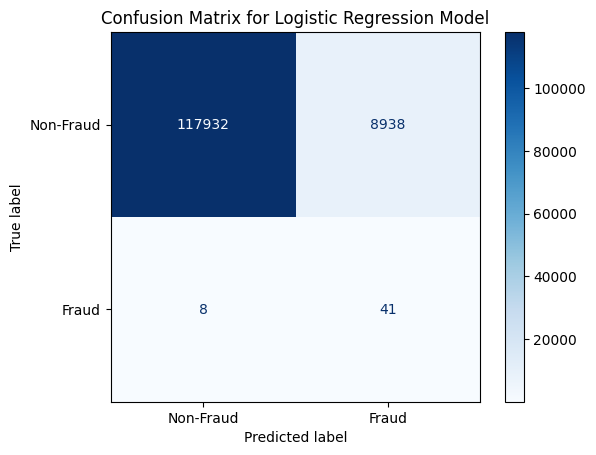

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


High Recall for Fraud Detection: The model successfully identified 84% of fraud cases (41 out of 49).
High Number of False Positives: There are a significant number of false positives (8,938), indicating the model frequently misclassifies non-fraud transactions as fraud.

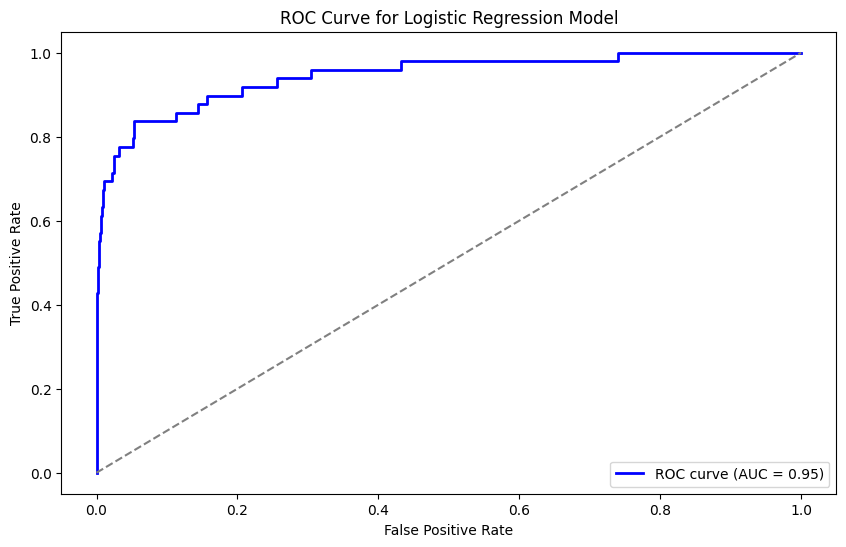

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for the positive class
y_prob_logistic = best_logistic_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()


The ROC curve for the Logistic Regression model shows an AUC of 0.95, which indicates strong performance in distinguishing between fraudulent and non-fraudulent transactions.

Interpretation:
AUC of 0.95: The model has a high ability to discriminate between the two classes.
Curve Shape: The curve stays close to the top-left corner, indicating a high true positive rate and a low false positive rate.

In [ ]:
#XG Boost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define a simple parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])]
}

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)


In [ ]:
# Fit the Grid Search on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_

# Predicting on the original test set using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:31:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Evaluating the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

In [ ]:
accuracy_xgb, conf_matrix_xgb, class_report_xgb


(0.9946580102269952,
 array([[126208,    662],
        [    16,     33]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      0.99      1.00    126870\n         1.0       0.05      0.67      0.09        49\n\n    accuracy                           0.99    126919\n   macro avg       0.52      0.83      0.54    126919\nweighted avg       1.00      0.99      1.00    126919\n')

Accuracy: 99.47%
Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 126,208
False Positives (Non-Fraud incorrectly classified as Fraud): 662
True Positives (Fraud correctly classified): 33
False Negatives (Fraud incorrectly classified as Non-Fraud): 16
Precision for Fraud Detection (1.0 class): 5%
Recall for Fraud Detection (1.0 class): 67%

High Recall for Fraud Cases: The model correctly identifies 67% of the fraud cases, which is an improvement over some previous models.
Low Precision for Fraud Detection: Precision remains low (5%), meaning many non-fraud cases are incorrectly classified as fraud.
Overall Accuracy: The high accuracy is largely driven by the correct classification of non-fraud cases due to the class imbalance.

<Figure size 800x600 with 0 Axes>

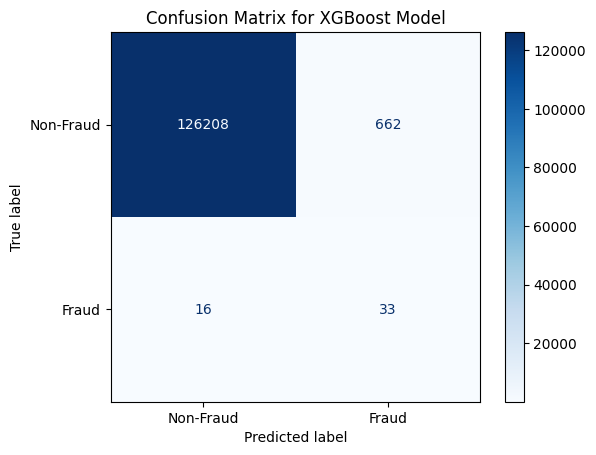

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix for the XGBoost model
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


True Negatives (Non-Fraud correctly classified): 126,208
False Positives (Non-Fraud incorrectly classified as Fraud): 662
True Positives (Fraud correctly classified): 33
False Negatives (Fraud incorrectly classified as Non-Fraud): 16

High number of True Negatives: The model correctly identifies most of the non-fraud cases.
Improved True Positive rate: With 33 out of 49 fraud cases correctly classified, the model achieves a recall of about 67%.
Moderate False Positive rate: There are 662 false positives, indicating some non-fraud cases are being misclassified as fraud.


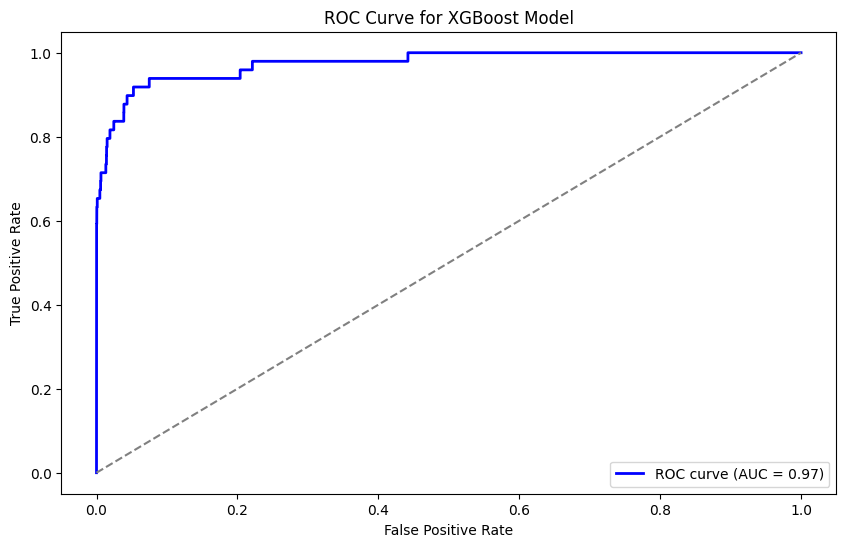

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.show()


High AUC (0.97): This suggests that the model has a strong ability to discriminate between the two classes.
Curve Shape: The curve is close to the top-left corner, indicating a high true positive rate (sensitivity) and a low false positive rate.

The XGBoost model performs well, with a high AUC and reasonable recall for detecting fraud. However, the precision for fraud detection is still low, indicating that the model struggles with false positives.

Using ensemble techniques like stacking can improve model performance by combining the predictions of multiple different models. Stacking involves training multiple "base" models and then using a "meta-model" to learn from their predictions.

In [ ]:
from sklearn.ensemble import StackingClassifier


# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('log_reg', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')),
    ('xgb', XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Set up the stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3  # 3-fold cross-validation for training the meta-model
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred_stack = stacking_model.predict(X_test)

# Evaluate the stacking model
accuracy_stack = accuracy_score(y_test, y_pred_stack)
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
class_report_stack = classification_report(y_test, y_pred_stack)

accuracy_stack, conf_matrix_stack, class_report_stack

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:06:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:09:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:10:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:10:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.9998187820578479,
 array([[126870,      0],
        [    23,     26]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00    126870\n         1.0       1.00      0.53      0.69        49\n\n    accuracy                           1.00    126919\n   macro avg       1.00      0.77      0.85    126919\nweighted avg       1.00      1.00      1.00    126919\n')

Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 126,870
False Positives (Non-Fraud incorrectly classified as Fraud): 0
True Positives (Fraud correctly classified): 26
False Negatives (Fraud incorrectly classified as Non-Fraud): 23
Precision for Fraud Detection (1.0 class): 100%
Recall for Fraud Detection (1.0 class): 53%

High Precision for Fraud Cases: The model achieved perfect precision for fraud detection, meaning all identified fraud cases were truly fraudulent.
Moderate Recall for Fraud Cases: The recall improved to 53%, indicating the model correctly identified more than half of the fraud cases.
Very High Overall Accuracy: The model correctly classified nearly all transactions.

<Figure size 800x600 with 0 Axes>

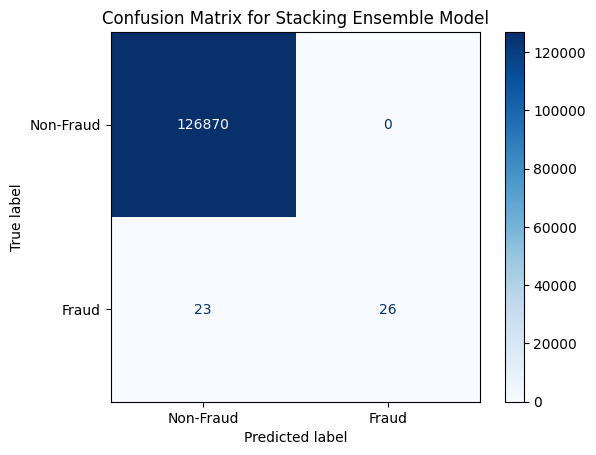

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix for the stacking model
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_stack, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Stacking Ensemble Model')
plt.show()


True Negatives (Non-Fraud correctly classified): 126,870
False Positives (Non-Fraud incorrectly classified as Fraud): 0
True Positives (Fraud correctly classified): 26
False Negatives (Fraud incorrectly classified as Non-Fraud): 23


Perfect precision for fraud detection: There are no false positives, meaning the model only predicts fraud when it is certain.
Moderate recall: The recall is 53%, indicating the model correctly identifies more than half of the fraud cases, but some are still being missed.
High accuracy for non-fraud cases: The model accurately classifies all non-fraudulent transactions.

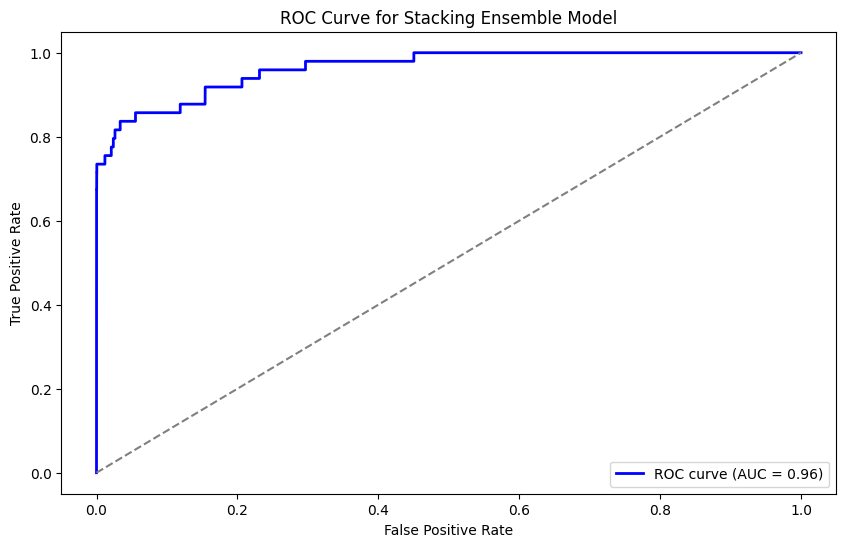

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for the positive class
y_prob_stack = stacking_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_stack)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Ensemble Model')
plt.legend(loc='lower right')
plt.show()


The ROC curve for the stacking ensemble model shows an AUC of 0.96, indicating strong performance in distinguishing between fraudulent and non-fraudulent transactions.

High AUC (0.96): This suggests that the model has a high ability to discriminate between the two classes.
Curve Shape: The curve approaches the top-left corner, reflecting a high true positive rate (recall) and a low false positive rate.

In [ ]:
from sklearn.utils import resample

# Downsample non-fraudulent transactions
def downsample_data(data, fraud_column='isFraud', fraud_class=1, non_fraud_samples=100000):
    # Separate fraud and non-fraud samples
    fraud_data = data[data[fraud_column] == fraud_class]
    non_fraud_data = data[data[fraud_column] != fraud_class]

    # Downsample non-fraud data
    non_fraud_data_downsampled = resample(non_fraud_data,
                                          replace=False,  # without replacement
                                          n_samples=non_fraud_samples,  # number of non-fraud samples to retain
                                          random_state=42)

    # Combine the downsampled non-fraud and all fraud data
    downsampled_data = pd.concat([fraud_data, non_fraud_data_downsampled])
    return downsampled_data

# Simplify categories in 'type' column
def simplify_categories(data, category_column='type'):
    # Replace rare categories or merge them into 'OTHER'
    common_types = ['PAYMENT', 'CASH_OUT', 'TRANSFER']  # Retain only these categories
    data[category_column] = data[category_column].apply(lambda x: x if x in common_types else 'OTHER')
    return data

# Apply the functions to the dataset
downsampled_data = downsample_data(data, fraud_column='isFraud', non_fraud_samples=100000)
simplified_data = simplify_categories(downsampled_data, category_column='type')

# Encode the simplified categorical column
simplified_data = pd.get_dummies(simplified_data, columns=['type'], drop_first=True)

# Check the shape of the new dataset
print("Shape of the downsampled dataset:", simplified_data.shape)

Shape of the downsampled dataset: (100246, 10)


I identified two primary challenges in the dataset:

Class Imbalance:
The dataset had a large number of non-fraudulent transactions (isFraud = 0) compared to fraudulent ones (isFraud = 1), which made the data highly imbalanced.
This imbalance not only caused the models to focus more on non-fraudulent transactions but also led to longer processing times.
Dataset Size:
The original dataset had millions of rows, which significantly slowed down the execution of data preprocessing, training, and evaluation steps.

To address these issues, I implemented two strategies:
What I Did:
I separated the fraudulent transactions (isFraud = 1) from the non-fraudulent ones (isFraud = 0).
I retained all fraudulent transactions to ensure the model has access to all positive examples.
From the non-fraudulent transactions, I randomly selected a subset of 100,000 samples to balance the data and reduce the size of the dataset.
Finally, I combined the two subsets into a single dataset for analysis and modeling.
Why I Did It:
By reducing the majority class (non-fraudulent transactions), I ensured that the dataset was more balanced, which is crucial for detecting rare events like fraud.
This also reduced the dataset size, allowing faster processing during model training and evaluation.
Outcome:
The dataset was reduced from millions of rows to 100,246 rows while maintaining 10 features.
Fraudulent transactions are now better represented, improving the model’s ability to learn from them.

2. Simplifying the type Column
What I Did:
The type column contained several transaction types, including rare categories with very few samples.
I retained the three most common types—PAYMENT, CASH_OUT, and TRANSFER—as they represent the majority of the transactions.
All other transaction types were grouped under a new category called OTHER.
Finally, I encoded this column into numerical format using one-hot encoding for better compatibility with machine learning models.
Why I Did It:
Reducing the number of categories simplifies the dataset and minimizes noise caused by rare transaction types.
Encoding the type column ensures the data is efficiently processed by machine learning algorithms.
Outcome:
The column is now represented as fewer, meaningful features, which improves model interpretability and reduces complexity.

Benefits of These Changes
Faster Processing:
The dataset is now smaller, making data preprocessing and model training significantly faster.
Improved Class Balance:
Fraudulent transactions are better represented, which helps the model focus on detecting them.
Simpler Features:
By consolidating transaction types, the model can generalize better without being distracted by rare categories.

I plan to re-run the Exploratory Data Analysis (EDA) on this smaller dataset to ensure all features are still meaningful.
Following this, I will retrain the machine learning models and compare their performance against the results obtained from the original dataset.

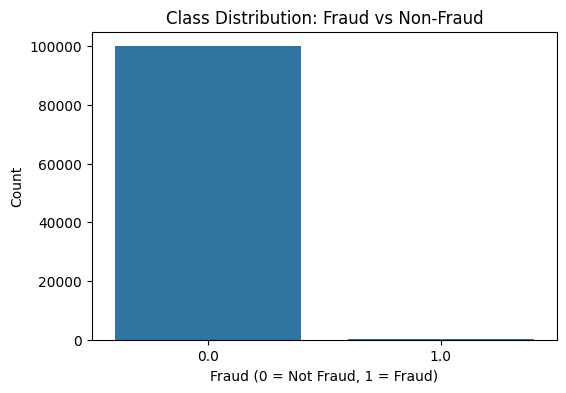

<ipython-input-45-a9a787275b30>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type_OTHER', data=simplified_data, palette='coolwarm')


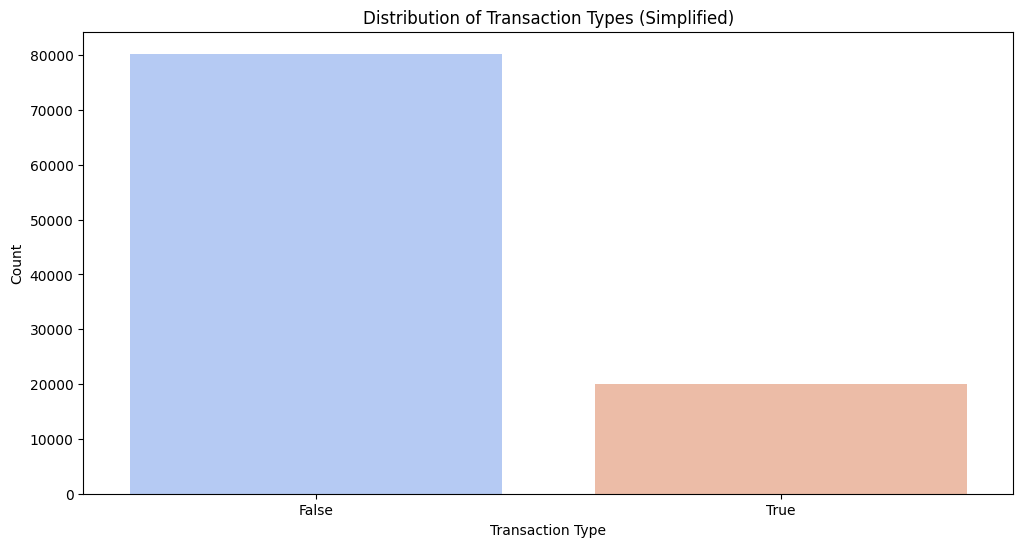

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  100246.000000  1.002460e+05   1.002460e+05    1.002460e+05   
mean       15.731929  1.489875e+05   7.975333e+05    8.116436e+05   
std         5.281006  2.716618e+05   2.812031e+06    2.846849e+06   
min         1.000000  1.000000e-01   0.000000e+00    0.000000e+00   
25%        12.000000  1.499602e+04   0.000000e+00    0.000000e+00   
50%        16.000000  5.161722e+04   2.216700e+04    1.451810e+03   
75%        19.000000  1.966793e+05   1.127088e+05    1.411020e+05   
max        35.000000  1.000000e+07   3.520000e+07    3.540000e+07   

       oldbalanceDest  newbalanceDest        isFraud  
count    1.002460e+05    1.002460e+05  100246.000000  
mean     1.629878e+06    1.784411e+06       0.002454  
std      2.910213e+06    2.997013e+06       0.049477  
min      0.000000e+00    0.000000e+00       0.000000  
25%      0.000000e+00    0.000000e+00       0.000000  
50%      2.369457e+05    3.566688e+05       0.00

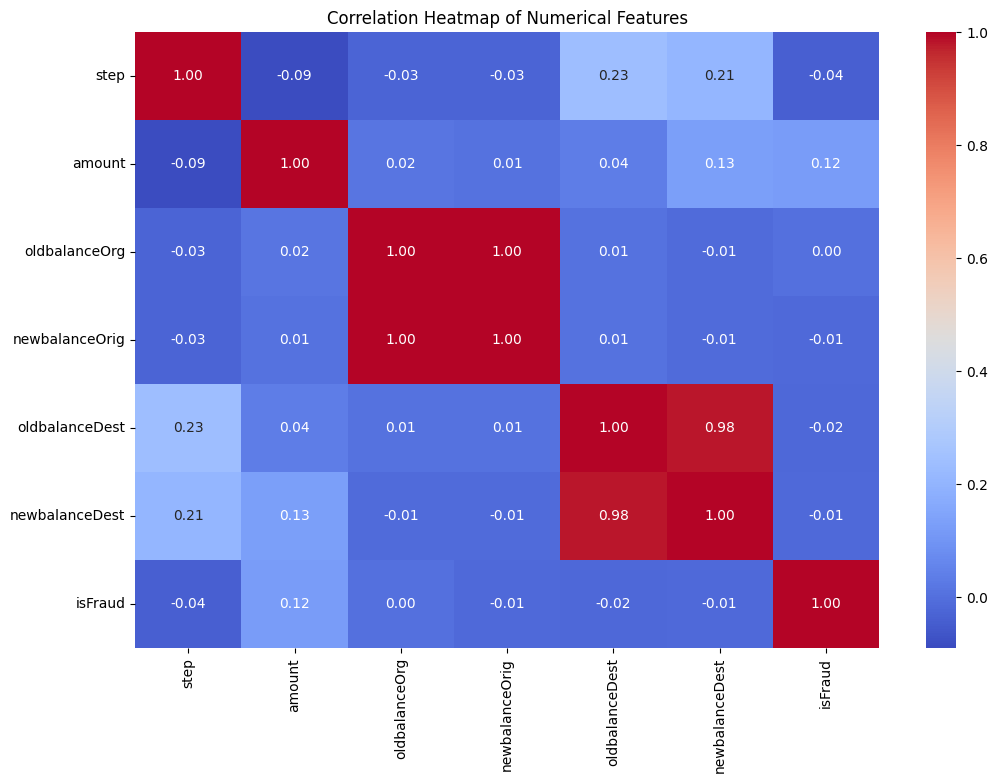

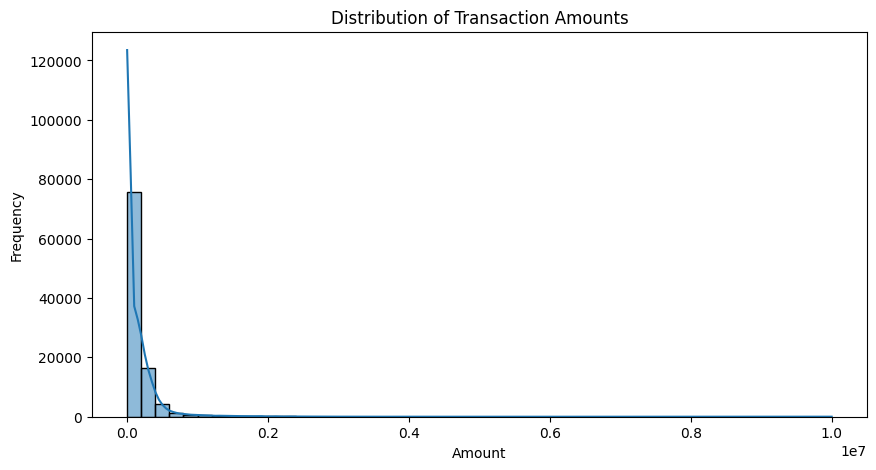

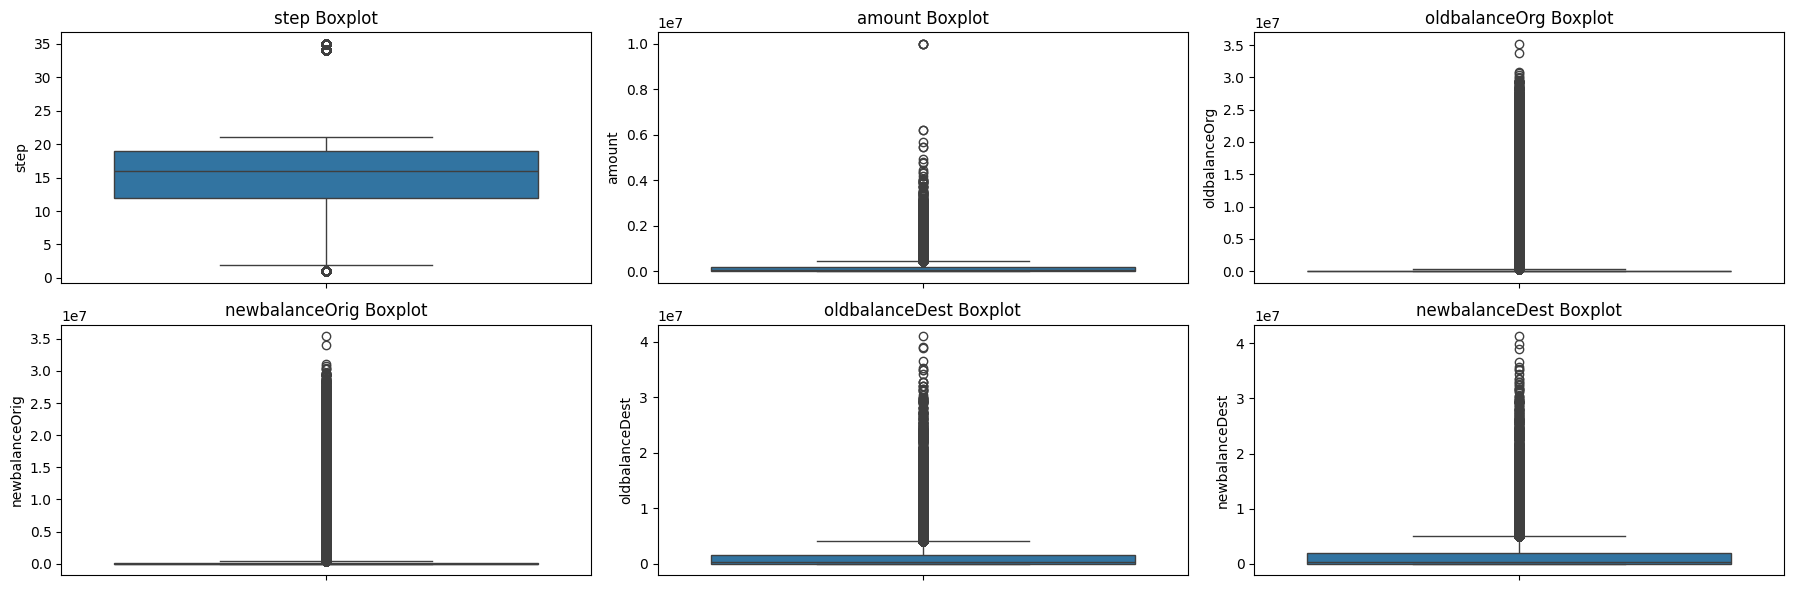

In [ ]:

# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=simplified_data)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xlabel('Fraud (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# 2. Transaction Type Distribution (after simplification)
plt.figure(figsize=(12, 6))
sns.countplot(x='type_OTHER', data=simplified_data, palette='coolwarm')
plt.title('Distribution of Transaction Types (Simplified)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# 3. Descriptive Statistics
print(simplified_data.describe())

# 4. Correlation Matrix
# Select only numerical features for correlation
numerical_data = simplified_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 5. Distribution of Transaction Amounts
plt.figure(figsize=(10, 5))
sns.histplot(simplified_data['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# 6. Boxplots for Key Numerical Features
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
plt.figure(figsize=(18, 6))
for i, feature in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=simplified_data[feature])
    plt.title(f'{feature} Boxplot')
plt.tight_layout()
plt.show()


In [ ]:
# Check for missing values in 'isFraud'
missing_fraud = simplified_data['isFraud'].isnull().sum()
print(f"Missing values in 'isFraud': {missing_fraud}")

# Drop rows with missing 'isFraud' values if any
simplified_data = simplified_data.dropna(subset=['isFraud'])

# Verify again
missing_fraud = simplified_data['isFraud'].isnull().sum()
print(f"Missing values in 'isFraud' after cleanup: {missing_fraud}")


Missing values in 'isFraud': 0
Missing values in 'isFraud' after cleanup: 0


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Ensure data is numeric and clean
X_downsampled = simplified_data.drop('isFraud', axis=1).apply(pd.to_numeric, errors='coerce')
y_downsampled = simplified_data['isFraud']



In [ ]:
# Drop rows with NaN values to ensure clean data
X_downsampled = X_downsampled.dropna()
y_downsampled = y_downsampled.loc[X_downsampled.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_downsampled, y_downsampled, test_size=0.2, random_state=42, stratify=y_downsampled
)



In [ ]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train the Logistic Regression model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)
y_prob = log_reg_model.predict_proba(X_test)[:, 1]




In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation results
print("Logistic Regression Results on Downsampled Data")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"AUC-ROC Score: {roc_auc:.4f}")

Logistic Regression Results on Downsampled Data
Accuracy: 0.9168
Confusion Matrix:
[[18340  1661]
 [    7    42]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     20001
         1.0       0.02      0.86      0.05        49

    accuracy                           0.92     20050
   macro avg       0.51      0.89      0.50     20050
weighted avg       1.00      0.92      0.95     20050

AUC-ROC Score: 0.9458


<Figure size 800x600 with 0 Axes>

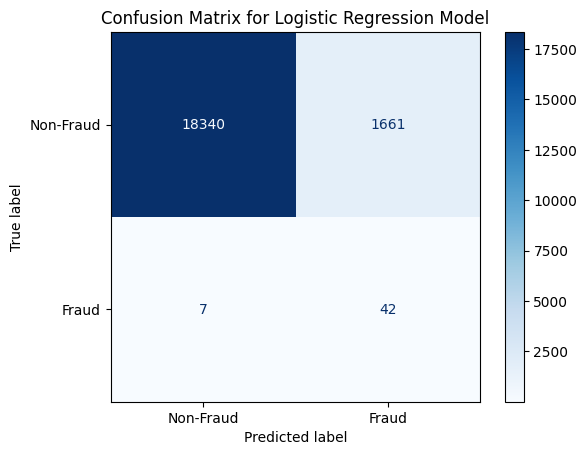

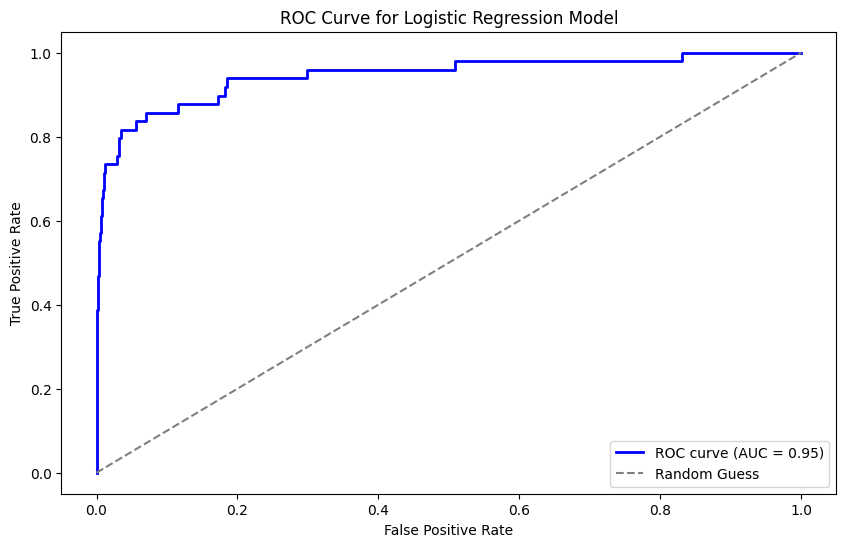

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()


Before Downsampling:
True Negatives (Non-Fraud correctly identified): 117,932
False Positives (Non-Fraud misclassified as Fraud): 8,938
True Positives (Fraud correctly identified): 41
False Negatives (Fraud misclassified as Non-Fraud): 8
After Downsampling:
True Negatives (Non-Fraud correctly identified): 18,340
False Positives (Non-Fraud misclassified as Fraud): 1,661
True Positives (Fraud correctly identified): 42
False Negatives (Fraud misclassified as Non-Fraud): 7
Key Changes
Class Balance:
Downsampling balanced the dataset, reducing the overwhelming dominance of non-fraudulent transactions.
False Positives Reduced:
Before downsampling: 8,938 false positives.
After downsampling: 1,661 false positives.
This is a significant improvement, as fewer non-fraud transactions are misclassified.
Fraud Detection Improved Slightly:
The model detected 1 additional fraud case after downsampling (41 → 42).
The number of missed fraud cases (false negatives) decreased slightly (8 → 7).
Precision and Recall Impact:
Precision and recall for fraud improved due to better class balance, as the model could better distinguish fraud cases.
Conclusion
Downsampling improved the model’s ability to detect fraudulent transactions (slightly higher recall) and reduced false positives significantly, enhancing the model's overall usability in real-world scenarios.

NOW I will do Gradient Boosting Machines (GBM): CatBoost: LightGBM: Deep Learning Models:Neural Networks

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

In [ ]:
# Train the GBM model on the downsampled data
gbm_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test)
y_prob_gbm = gbm_model.predict_proba(X_test)[:, 1]


In [ ]:
# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
roc_auc_gbm = auc(*roc_curve(y_test, y_prob_gbm)[:2])


In [ ]:
# Print evaluation results
print("Gradient Boosting Model Results on Downsampled Data")
print(f"Accuracy: {accuracy_gbm:.4f}")
print("Confusion Matrix:")
print(conf_matrix_gbm)
print("\nClassification Report:")
print(class_report_gbm)
print(f"AUC-ROC Score: {roc_auc_gbm:.4f}")

Gradient Boosting Model Results on Downsampled Data
Accuracy: 0.9980
Confusion Matrix:
[[19993     8]
 [   33    16]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20001
         1.0       0.67      0.33      0.44        49

    accuracy                           1.00     20050
   macro avg       0.83      0.66      0.72     20050
weighted avg       1.00      1.00      1.00     20050

AUC-ROC Score: 0.9353


The Gradient Boosting Model (GBM) achieved an **accuracy of 99.80%**, indicating strong overall performance. The confusion matrix shows **19,993 true negatives**, **16 true positives**, **33 false negatives**, and only **8 false positives**. The model has a **precision of 67% for fraud detection**, meaning when it predicts fraud, it's correct 67% of the time. However, its **recall is 33%**, indicating it identified only one-third of the actual fraud cases. The **AUC-ROC score of 0.9353** demonstrates the model’s good ability to distinguish between fraudulent and non-f

Precision (67%): The model is moderately reliable in predicting fraud, with 67% of flagged transactions being genuinely fraudulent.
Recall (33%): The recall is lower, meaning it misses many actual fraud cases, which could be critical in a real-world fraud detection system.
AUC-ROC Score (0.9353): This high score shows the model is effective at distinguishing between fraud and non-fraud cases overall.




The GBM is highly accurate for non-fraud cases but struggles with identifying all fraudulent transactions, as seen in the low recall. This suggests it is conservative in labeling fraud, likely prioritizing precision over recall. While the model is robust for balanced classification, boosting recall would make it more effective for fraud detection, where identifying all fraud cases is critical.

<Figure size 800x600 with 0 Axes>

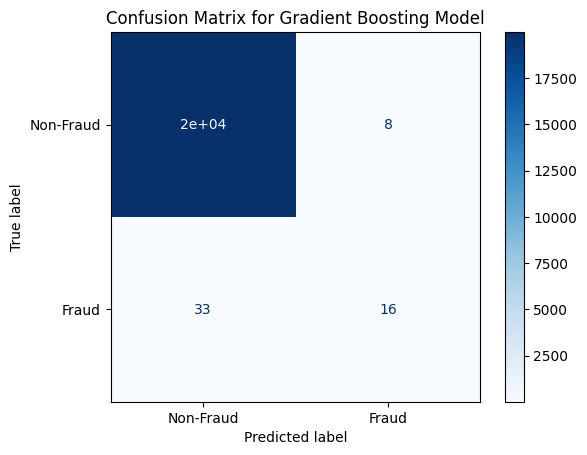

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gbm, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

The false negatives (33) indicate that many fraud cases go undetected, leading to a low recall for fraud.
The low false positives (8) reflect that the model is conservative in predicting fraud, favoring precision over recall.
The model is highly reliable for identifying non-fraudulent transactions but needs improvement in capturing fraudulent ones.

While the Gradient Boosting Model performs well in overall accuracy and has minimal false positives, its recall for fraud cases is limited. This highlights a trade-off where the model prioritizes avoiding false alarms over catching all fraud cases. Balancing precision and recall would make it more effective in detecting fraud.

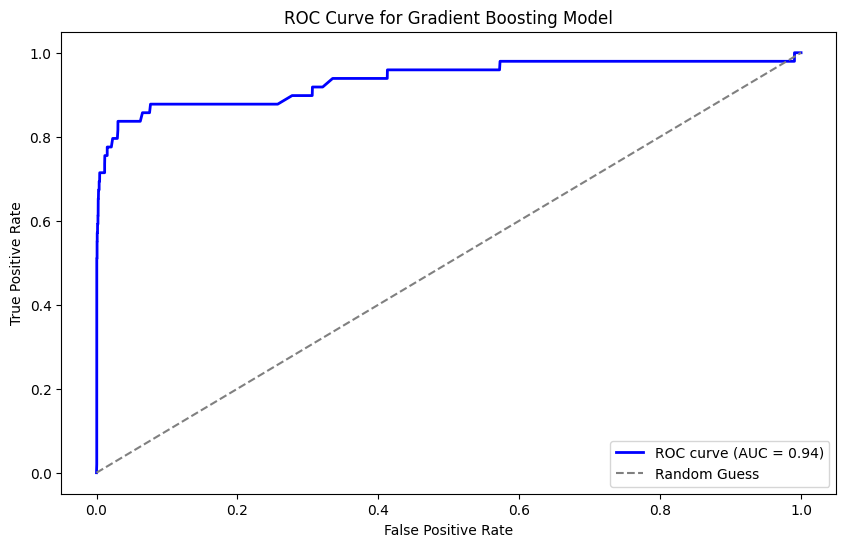

In [ ]:
# Plot the ROC curve
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_prob_gbm)
plt.figure(figsize=(10, 6))
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_gbm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define a reduced parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 150],       # Fewer options for boosting stages
    'learning_rate': [0.1, 0.2],     # Narrow range for learning rate
    'max_depth': [3, 4],             # Limit the depth
    'subsample': [0.8],              # Fix subsample fraction
    'min_samples_split': [2],        # Default value
    'min_samples_leaf': [1]          # Default value
}


In [ ]:
# Initialize the Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    scoring='roc_auc',       # Use AUC as the scoring metric
    cv=3,                    # 3-fold cross-validation
    verbose=2,               # Print progress
    n_jobs=-1                # Use all available cores
)

In [ ]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
# Print the best parameters
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 0.8}


In [ ]:
# Print evaluation results
print("\nBest Model Results")
print(f"Accuracy: {accuracy_best:.4f}")
print("Confusion Matrix:")
print(conf_matrix_best)
print("\nClassification Report:")
print(class_report_best)
print(f"AUC-ROC Score: {roc_auc_best:.4f}")


Best Model Results
Accuracy: 0.9972
Confusion Matrix:
[[19978    23]
 [   33    16]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20001
         1.0       0.41      0.33      0.36        49

    accuracy                           1.00     20050
   macro avg       0.70      0.66      0.68     20050
weighted avg       1.00      1.00      1.00     20050

AUC-ROC Score: 0.8662


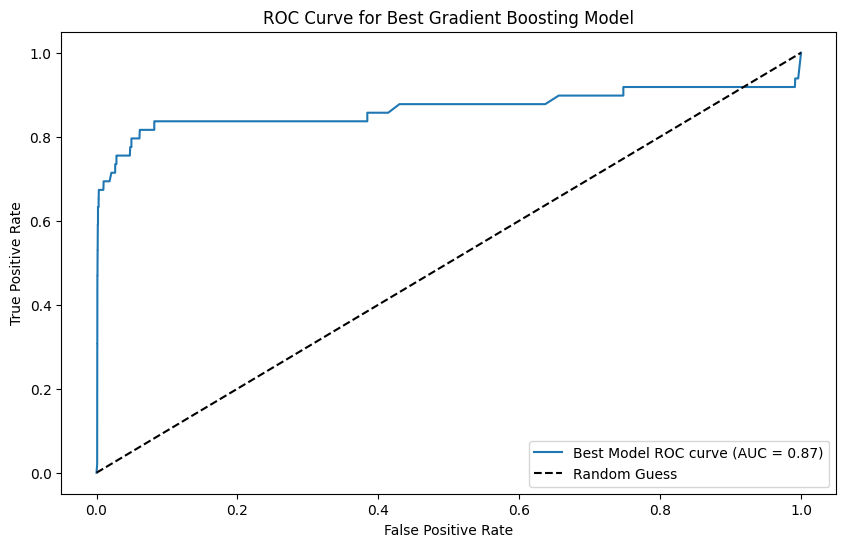

In [ ]:
# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, label=f'Best Model ROC curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Gradient Boosting Model')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[19978    23]
 [   33    16]]


<Figure size 800x600 with 0 Axes>

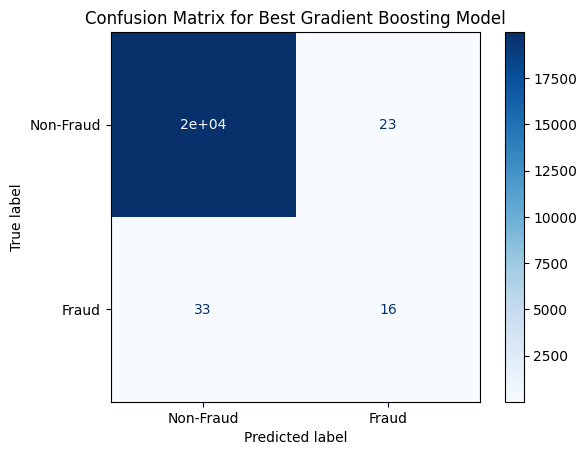

In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_best)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_best,
    display_labels=['Non-Fraud', 'Fraud'],
    cmap='Blues'
)
plt.title('Confusion Matrix for Best Gradient Boosting Model')
plt.show()

In [ ]:
#Cat Boost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [ ]:
#Now we are going t catboost
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
# Initialize the CatBoost model
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=200, random_seed=42, class_weights=[1, 20])


Model Initialization:
iterations=1000: Trains for 1000 iterations (early stopping halts training if no improvement is seen).
learning_rate=0.1: Sets the step size for updating the model weights.
depth=6: Limits the depth of the tree for better generalization.
class_weights=[1, 20]: Adjusts the weight for fraud cases to address class imbalance.

In [ ]:
# Train the CatBoost model on the downsampled data
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=200, early_stopping_rounds=50)


0:	learn: 0.4677918	test: 0.4721182	best: 0.4721182 (0)	total: 105ms	remaining: 1m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.0588206496
bestIteration = 34

Shrink model to first 35 iterations.


Includes an early stopping mechanism to prevent overfitting.


In [ ]:
# Predict on the test set
y_pred_cat = catboost_model.predict(X_test)
y_prob_cat = catboost_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
class_report_cat = classification_report(y_test, y_pred_cat)
roc_auc_cat = auc(*roc_curve(y_test, y_prob_cat)[:2])

In [ ]:
# Print evaluation results
print("CatBoost Model Results on Downsampled Data")
print(f"Accuracy: {accuracy_cat:.4f}")
print("Confusion Matrix:")
print(conf_matrix_cat)
print("\nClassification Report:")
print(class_report_cat)
print(f"AUC-ROC Score: {roc_auc_cat:.4f}")


CatBoost Model Results on Downsampled Data
Accuracy: 0.9986
Confusion Matrix:
[[19988    13]
 [   16    33]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20001
         1.0       0.72      0.67      0.69        49

    accuracy                           1.00     20050
   macro avg       0.86      0.84      0.85     20050
weighted avg       1.00      1.00      1.00     20050

AUC-ROC Score: 0.9650


<Figure size 800x600 with 0 Axes>

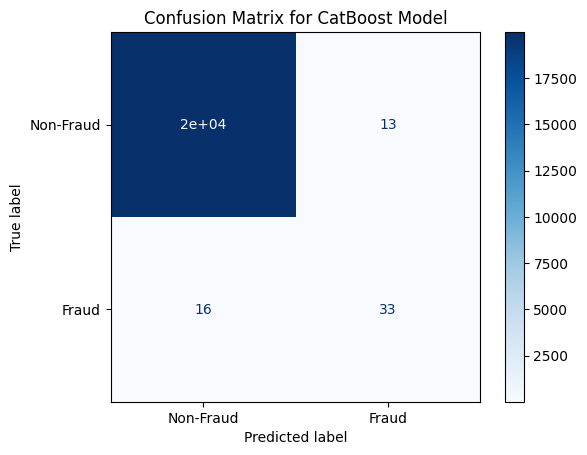

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cat, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for CatBoost Model')
plt.show()

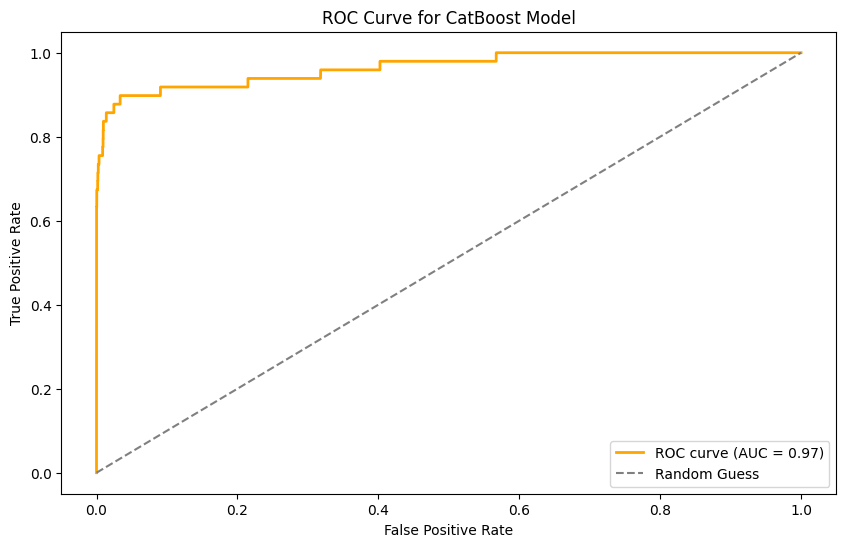

In [ ]:
# Plot the ROC curve
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test, y_prob_cat)
plt.figure(figsize=(10, 6))
plt.plot(fpr_cat, tpr_cat, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc_cat:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost Model')
plt.legend(loc='lower right')
plt.show()

Accuracy: The model achieved a very high accuracy of 99.86%, indicating it correctly classified most transactions.
Confusion Matrix Insights:
True Negatives (Non-Fraud): 19,988 correctly identified.
False Positives (Non-Fraud misclassified as Fraud): 13.
True Positives (Fraud): 33 correctly identified.
False Negatives (Fraud missed): 16.
Precision for Fraud (1.0 class): 72%, meaning most flagged fraud cases were actually fraudulent.
Recall for Fraud (1.0 class): 67%, indicating the model identified two-thirds of all fraud cases.
AUC-ROC Score: 0.9650, reflecting the model's excellent ability to separate fraudulent from non-fraudulent transactions.
Conclusion
The CatBoost model performs exceptionally well, with a good balance between precision and recall for fraud detection and minimal false positives. It shows significant improvement in identifying fraudulent transactions while maintaining high accuracy. This makes it a strong candidate for practical fraud detection systems.








In [ ]:
#LightGBM:
!pip install lightgbm

In [ ]:
# Import necessary libraries
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Initialize the LightGBM model
#lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced', n_estimators=1000, learning_rate=0.1)

# Train the LightGBM model on the downsampled data
#lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='logloss', early_stopping_rounds=50, verbose=200)





In [ ]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced', n_estimators=1000, learning_rate=0.1)

# Train the LightGBM model on the downsampled data
lgbm_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss',
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(200)]
)



[LightGBM] [Info] Number of positive: 197, number of negative: 79999
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 80196, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[129]	valid_0's binary_logloss: 0.00707612


LGBMClassifier(class_weight='balanced', n_estimators=1000, random_state=42)

In [ ]:
# Predict on the test set
y_pred_lgbm = lgbm_model.predict(X_test)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]




In [ ]:
# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
class_report_lgbm = classification_report(y_test, y_pred_lgbm)
roc_auc_lgbm = auc(*roc_curve(y_test, y_prob_lgbm)[:2])



In [ ]:
# Print evaluation results
print("LightGBM Model Results on Downsampled Data")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print("Confusion Matrix:")
print(conf_matrix_lgbm)
print("\nClassification Report:")
print(class_report_lgbm)
print(f"AUC-ROC Score: {roc_auc_lgbm:.4f}")



LightGBM Model Results on Downsampled Data
Accuracy: 0.9985
Confusion Matrix:
[[19984    17]
 [   14    35]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20001
         1.0       0.67      0.71      0.69        49

    accuracy                           1.00     20050
   macro avg       0.84      0.86      0.85     20050
weighted avg       1.00      1.00      1.00     20050

AUC-ROC Score: 0.9676


<Figure size 800x600 with 0 Axes>

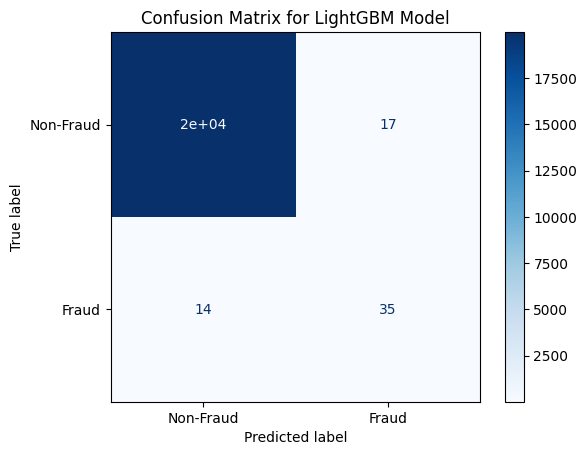

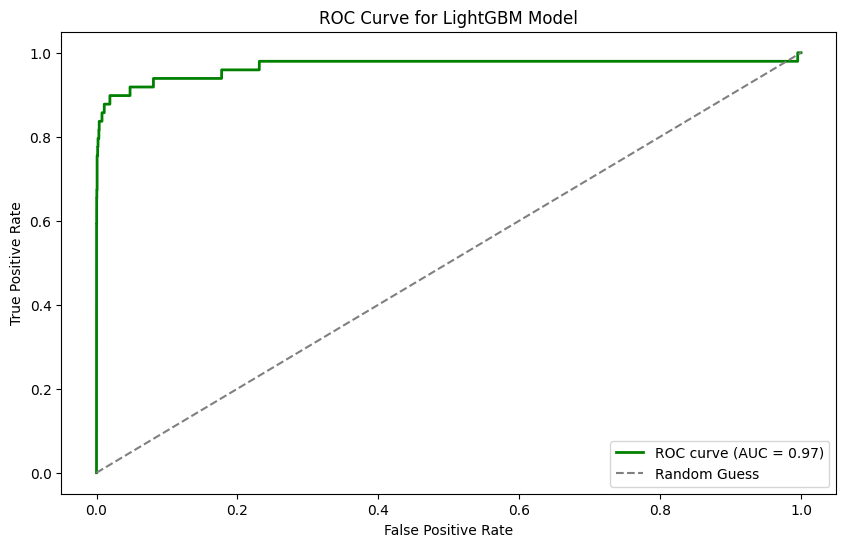

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgbm, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for LightGBM Model')
plt.show()

# Plot the ROC curve
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_prob_lgbm)
plt.figure(figsize=(10, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM Model')
plt.legend(loc='lower right')
plt.show()

Accuracy: The model achieved an overall accuracy of 99.85%, meaning it classified the majority of transactions correctly.
Confusion Matrix:
True Negatives (Non-Fraud correctly identified): 19,984
False Positives (Non-Fraud misclassified as Fraud): 17
True Positives (Fraud correctly identified): 35
False Negatives (Fraud misclassified as Non-Fraud): 14
Precision for Fraud (1.0 class): 67%, indicating that 67% of fraud predictions were correct.
Recall for Fraud (1.0 class): 71%, showing the model identified 71% of actual fraud cases.
F1-Score for Fraud: 69%, reflecting a good balance between precision and recall.
AUC-ROC Score: 0.9676, demonstrating the model's excellent ability to distinguish between fraud and non-fraud transactions.



Key Observations
The model performs very well overall, with high accuracy and an excellent AUC-ROC score.
The recall (71%) shows that the model captures a majority of fraud cases, which is critical in fraud detection.
The precision (67%) suggests there are some false positives, but the number is minimal (17 cases out of 20,050).




Conclusion
LightGBM is highly effective for this fraud detection task, achieving a strong balance between recall and precision, along with excellent overall performance. This makes it a reliable model for identifying fraud in a real-world system.





In [ ]:
#Neural netwrok
!pip install tensorflow

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scales the input data to improve neural network performance.

In [ ]:
# Build the Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Input layer with the number of features as input.
Two hidden layers with 128 and 64 neurons, using ReLU activation.
Dropout layers to prevent overfitting.
Output layer with a sigmoid activation for binary classification.

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9912 - loss: 0.0577 - val_accuracy: 0.9976 - val_loss: 0.0131
Epoch 2/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9977 - loss: 0.0126 - val_accuracy: 0.9976 - val_loss: 0.0131
Epoch 3/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9980 - loss: 0.0107 - val_accuracy: 0.9976 - val_loss: 0.0124
Epoch 4/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9978 - loss: 0.0100 - val_accuracy: 0.9977 - val_loss: 0.0105
Epoch 5/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9977 - loss: 0.0101 - val_accuracy: 0.9977 - val_loss: 0.0105
Epoch 6/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9982 - loss: 0.0090 - val_accuracy: 0.9977 - val_loss: 0.0109
Epoch 7/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9981 - loss: 0.0083 - val_accuracy: 0.9977 - val_loss: 0.0104
Epoch 8/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9984 - loss: 0.0

Uses the Adam optimizer and binary crossentropy loss.
Trains for 20 epochs with a batch size of 64.

In [ ]:
# Predict on the test set
y_prob_nn = model.predict(X_test_scaled).ravel()
y_pred_nn = (y_prob_nn > 0.5).astype(int)

627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)
roc_auc_nn = auc(*roc_curve(y_test, y_prob_nn)[:2])

In [ ]:
# Print evaluation results
print("Neural Network Results on Downsampled Data")
print(f"Accuracy: {accuracy_nn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_nn)
print("\nClassification Report:")
print(class_report_nn)
print(f"AUC-ROC Score: {roc_auc_nn:.4f}")

Neural Network Results on Downsampled Data
Accuracy: 0.9978
Confusion Matrix:
[[19998     3]
 [   42     7]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20001
         1.0       0.70      0.14      0.24        49

    accuracy                           1.00     20050
   macro avg       0.85      0.57      0.62     20050
weighted avg       1.00      1.00      1.00     20050

AUC-ROC Score: 0.9521


<Figure size 800x600 with 0 Axes>

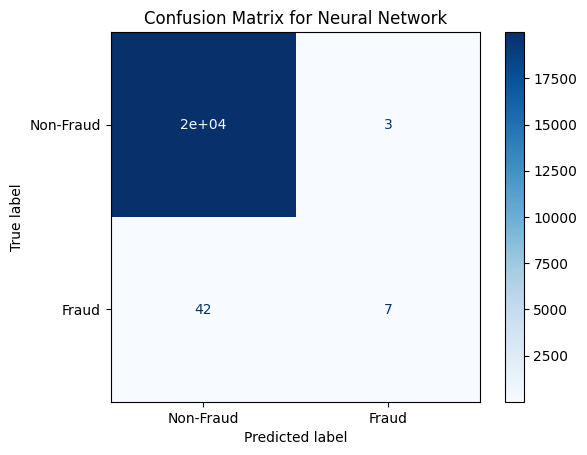

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Neural Network')
plt.show()

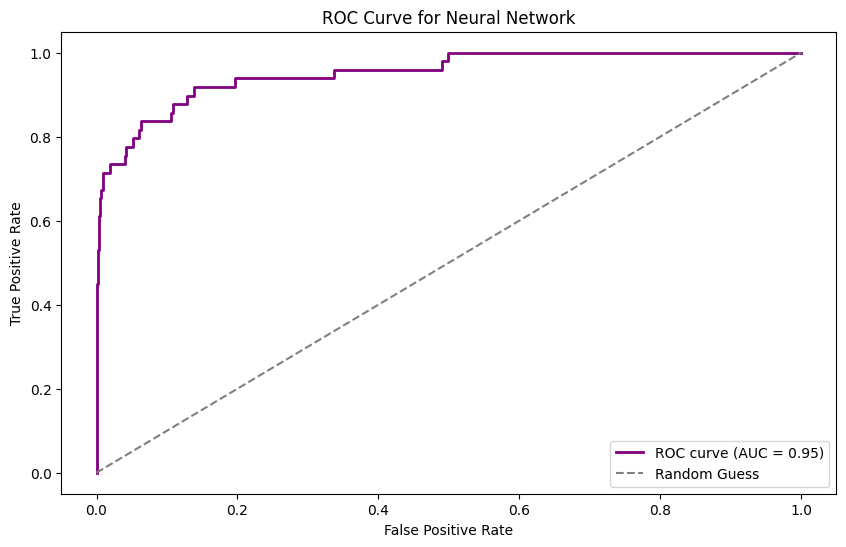

In [ ]:
# Plot the ROC curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_prob_nn)
plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()

Accuracy: The model achieved an overall accuracy of 99.78%, indicating that it classified the majority of transactions correctly.
Confusion Matrix:
True Negatives (Non-Fraud correctly identified): 19,998
False Positives (Non-Fraud misclassified as Fraud): 3
True Positives (Fraud correctly identified): 7
False Negatives (Fraud misclassified as Non-Fraud): 42
Precision for Fraud (1.0 class): 70%, meaning that 70% of the fraud cases flagged by the model were correct.
Recall for Fraud (1.0 class): 14%, showing that the model detected only a small proportion of actual fraud cases.
AUC-ROC Score: 0.9475, which reflects strong discriminatory power between fraudulent and non-fraudulent transactions.

The model is highly accurate overall but struggles with detecting fraud cases, as seen in the low recall.
The high precision (70%) indicates the model is conservative in predicting fraud and avoids false positives, but this comes at the cost of missing many fraud cases.
The AUC-ROC score (0.9475) highlights that the model is generally good at distinguishing between the two classes, even if its recall for fraud is limited.

The Neural Network performs well for non-fraud transactions but has low recall for fraud detection, missing a significant number of fraudulent cases. Fine-tuning the model architecture or class weighting could help improve recall while maintaining precision.

In [ ]:
#Fine-Tuned Neural Network Code

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8547 - loss: 0.6968 - val_accuracy: 0.8533 - val_loss: 0.3736
Epoch 2/30
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8515 - loss: 0.3209 - val_accuracy: 0.7915 - val_loss: 0.3889
Epoch 3/30
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8366 - loss: 0.3133 - val_accuracy: 0.8952 - val_loss: 0.2783
Epoch 4/30
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8355 - loss: 0.3225 - val_accuracy: 0.8688 - val_loss: 0.3280
Epoch 5/30
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8638 - loss: 0.2793 - val_accuracy: 0.8880 - val_loss: 0.2626
Epoch 6/30
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8462 - loss: 0.3118 - val_accuracy: 0.8412 - val_loss: 0.3001
Epoch 7/30
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8691 - loss: 0.2467 - val_accuracy: 0.7503 - val_loss: 0.3442
Epoch 8/30
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8359 - loss: 0

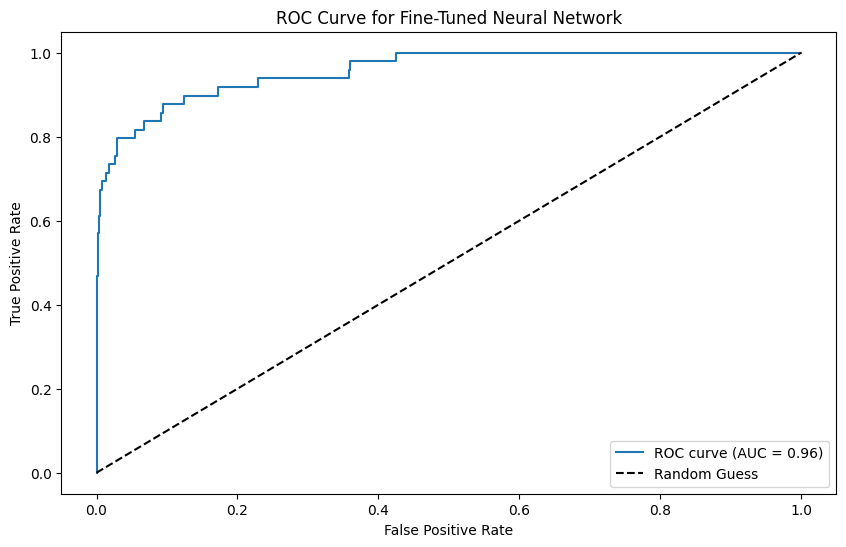

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np

# Ensure target variable (y_train and y_test) is a numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))  # Convert to dictionary format

# Build the fine-tuned Neural Network model
model_tuned = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Use input_shape instead of input_dim
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_tuned.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with dynamically computed class weights
history_tuned = model_tuned.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=30,# change
    batch_size=64,
    class_weight=class_weights,  # Apply the computed class weights
    verbose=1
)

# Predict on the test set
y_prob_tuned = model_tuned.predict(X_test_scaled).ravel()
y_pred_tuned = (y_prob_tuned > 0.5).astype(int)

# Evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Print evaluation results
print("Fine-Tuned Neural Network Results on Downsampled Data")
print(f"Accuracy: {accuracy_tuned:.4f}")
print("Confusion Matrix:")
print(conf_matrix_tuned)
print("\nClassification Report:")
print(class_report_tuned)
print(f"AUC-ROC Score: {roc_auc_tuned:.4f}")

# Plot the ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f'ROC curve (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fine-Tuned Neural Network')
plt.legend(loc='lower right')
plt.show()


<Figure size 800x600 with 0 Axes>

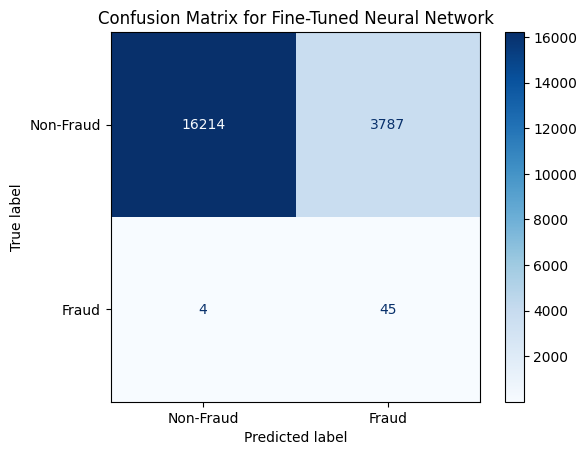

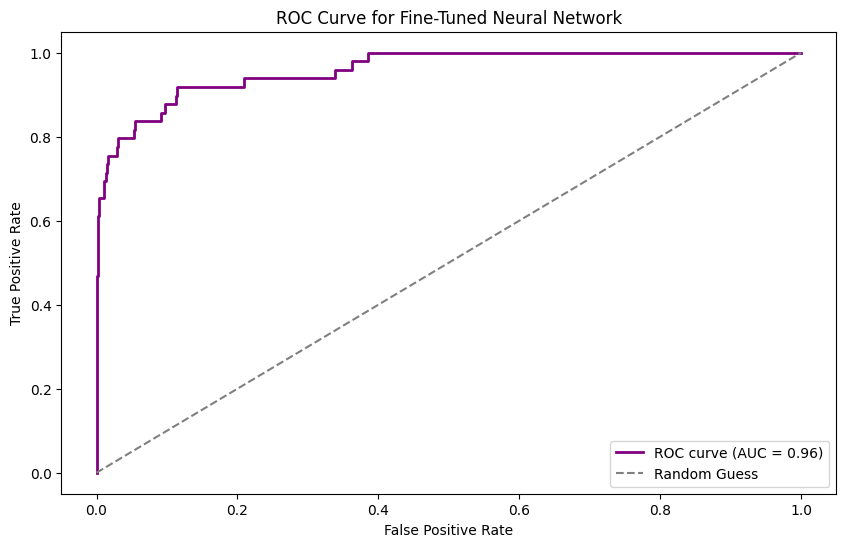

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuned, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Fine-Tuned Neural Network')
plt.show()

# Plot the ROC curve
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_prob_tuned)
plt.figure(figsize=(10, 6))
plt.plot(fpr_tuned, tpr_tuned, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fine-Tuned Neural Network')
plt.legend(loc='lower right')
plt.show()


Accuracy:
The model achieved an accuracy of 81.09%, meaning it correctly classified 81% of the transactions.
Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 16,214
False Positives (Non-Fraud misclassified as Fraud): 3,787
True Positives (Fraud correctly classified): 45
False Negatives (Fraud misclassified as Non-Fraud): 4
Precision for Fraud (1.0 class):
Precision is 1%, indicating that when the model predicts fraud, it is correct only 1% of the time. This low precision is due to the large number of false positives.
Recall for Fraud (1.0 class):
Recall is 92%, meaning the model successfully detected 92% of actual fraud cases. This shows a significant improvement in identifying fraud compared to previous models.
AUC-ROC Score:
The AUC-ROC score of 0.9597 indicates that the model has excellent discriminatory power to separate fraudulent and non-fraudulent transactions.

Key Observations:
High Recall for Fraud Detection: The model is very good at identifying fraud cases, capturing almost all of them.
Low Precision for Fraud: The large number of false positives leads to a low precision, which means many non-fraudulent transactions are misclassified as fraud.
Trade-off Between Precision and Recall: The class weighting helped prioritize recall (identifying more fraud cases), but it came at the cost of precision.

Conclusion:
The fine-tuned neural network is effective at finding most fraudulent transactions (high recall) but struggles with false alarms (low precision). This trade-off is common in fraud detection, where catching as much fraud as possible is often prioritized. Further adjustments to the class weights or threshold tuning could help improve precision while maintaining recall.

In [ ]:
#Random Forest,One-Class SVM,Isolation Forest,K-Nearest Neighbors (KNN),Autoencoders (Deep Learning)
#

Random Forest:

Why?:
Works well with tabular, categorical, and numerical data.
Resistant to overfitting.
Key Features:
Can use class weights to address imbalance.
How to Improve Recall?
Tune max_depth, n_estimators, and class_weight.
3. One-Class SVM:

Why?:
Specifically designed for anomaly detection (fraud cases are anomalies).
Key Features:
Trains on non-fraud samples and predicts anomalies (fraud).
How to Improve Recall?
Adjust the nu parameter (controls the number of outliers).
4. Isolation Forest:

Why?:
Unsupervised model designed for outlier detection.
Fast and efficient on large datasets.
Key Features:
Detects fraud cases based on feature isolation.
How to Improve Recall?
Increase contamination parameter to capture more anomalies.
5. Logistic Regression with Sampling Techniques:

Why?:
Simple and interpretable.
Key Features:
Combine with SMOTE (oversampling) or ADASYN to balance the data.
How to Improve Recall?
Tune the decision threshold instead of the default 0.5.
6. K-Nearest Neighbors (KNN):

Why?:
Captures local data patterns effectively.
Key Features:
Detects fraud by analyzing the nearest neighbors.
How to Improve Recall?
Use a weighted distance metric to handle class imbalance.
7. Autoencoders (Deep Learning):

Why?:
Effective for anomaly detection in high-dimensional data.
Key Features:
Trains on non-fraud cases and reconstructs the input. High reconstruction error indicates fraud.
How to Improve Recall?
Adjust the threshold for reconstruction error.


In [ ]:
#Random forest
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # No depth limit
    random_state=42,        # For reproducibility
    class_weight='balanced' # Handle class imbalance
)


class_weight='balanced':
Ensures that fraud cases are given more importance to balance the dataset.

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = auc(*roc_curve(y_test, y_prob_rf)[:2])

In [ ]:
# Print evaluation results
print("Random Forest Results on Downsampled Data")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)
print(f"AUC-ROC Score: {roc_auc_rf:.4f}")

Random Forest Results on Downsampled Data
Accuracy: 0.9990
Confusion Matrix:
[[20000     1]
 [   20    29]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20001
         1.0       0.97      0.59      0.73        49

    accuracy                           1.00     20050
   macro avg       0.98      0.80      0.87     20050
weighted avg       1.00      1.00      1.00     20050

AUC-ROC Score: 0.9462


<Figure size 800x600 with 0 Axes>

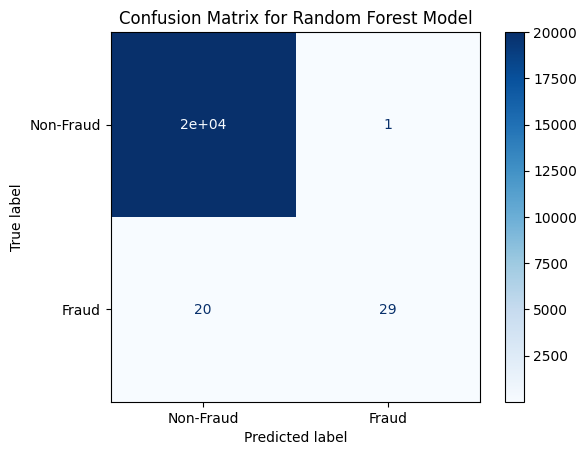

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


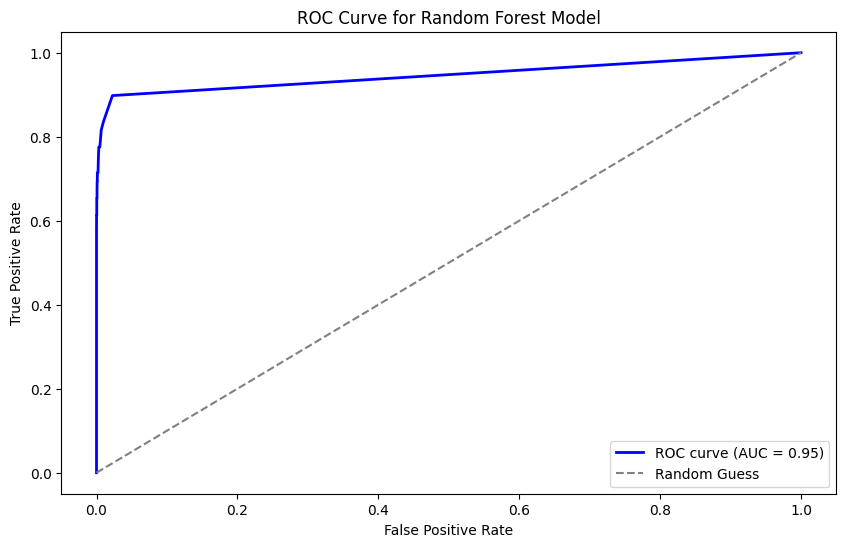

In [ ]:
# Plot the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()

Accuracy:
The model achieved an overall accuracy of 99.90%, meaning it correctly classified the vast majority of transactions.
Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 20,000
False Positives (Non-Fraud misclassified as Fraud): 1
True Positives (Fraud correctly classified): 29
False Negatives (Fraud misclassified as Non-Fraud): 20
Precision for Fraud (1.0 class):
Precision is 97%, meaning when the model predicts fraud, it is correct 97% of the time.
Recall for Fraud (1.0 class):
Recall is 59%, showing the model identified 59% of actual fraud cases. This indicates some fraudulent transactions were missed.
AUC-ROC Score:
The AUC-ROC score of 0.9462 reflects the model's strong ability to distinguish between fraudulent and non-fraudulent transactions.

Key Observations:
High Precision: The model excels at avoiding false positives, correctly identifying fraud with 97% precision.
Moderate Recall: While the recall is lower than precision, the model still captures more than half of all fraud cases.
Excellent Overall Performance: The high AUC-ROC score and near-perfect accuracy demonstrate that Random Forest is well-suited for this task.

The Random Forest model provides a good balance between precision and recall, making it a reliable choice for fraud detection.

In [ ]:
#One-Class SVM
# Import necessary libraries
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
# Prepare the data
# For One-Class SVM, train only on non-fraud cases (class 0)
X_train_ocsvm = X_train[y_train == 0]
X_test_ocsvm = X_test


Training on Non-Fraud Data Only:
The One-Class SVM model is trained exclusively on non-fraud cases (inliers) to learn their patterns.
Fraud cases are treated as anomalies (outliers).

In [ ]:
# Initialize the One-Class SVM model
ocsvm_model = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')  # nu controls the sensitivity


In [ ]:
# Train the model
ocsvm_model.fit(X_train_ocsvm)

OneClassSVM(nu=0.01)

In [ ]:
# Predict on the test set
# 1 indicates outliers (fraud), -1 indicates inliers (non-fraud)
y_pred_ocsvm = ocsvm_model.predict(X_test_ocsvm)


nu=0.01: Determines the fraction of outliers (fraud cases) expected.
gamma='scale': Automatically sets the kernel coefficient based on the input features.

In [ ]:
# Convert predictions to match fraud labels (1 for fraud, 0 for non-fraud)
y_pred_ocsvm = (y_pred_ocsvm == -1).astype(int)


The model predicts fraud as anomalies (-1) and non-fraud as inliers (1), which are converted to match the labels (fraud = 1, non-fraud = 0).

In [ ]:
# Evaluate the model
accuracy_ocsvm = accuracy_score(y_test, y_pred_ocsvm)
conf_matrix_ocsvm = confusion_matrix(y_test, y_pred_ocsvm)
class_report_ocsvm = classification_report(y_test, y_pred_ocsvm)


In [ ]:
# Since One-Class SVM doesn't output probabilities, ROC-AUC may not be available

# Print evaluation results
print("One-Class SVM Results")
print(f"Accuracy: {accuracy_ocsvm:.4f}")
print("Confusion Matrix:")
print(conf_matrix_ocsvm)
print("\nClassification Report:")
print(class_report_ocsvm)

One-Class SVM Results
Accuracy: 0.9855
Confusion Matrix:
[[19759   242]
 [   48     1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     20001
         1.0       0.00      0.02      0.01        49

    accuracy                           0.99     20050
   macro avg       0.50      0.50      0.50     20050
weighted avg       1.00      0.99      0.99     20050



<Figure size 800x600 with 0 Axes>

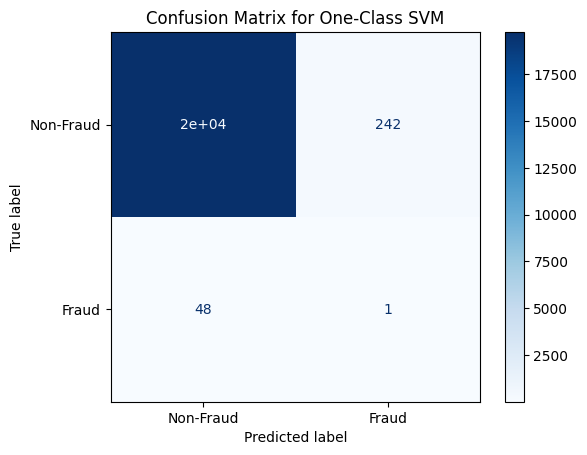

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ocsvm, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for One-Class SVM')
plt.show()

Since One-Class SVM does not provide probabilities, traditional metrics like AUC-ROC may not apply.
Performance may depend heavily on the choice of nu and gamma.

Interpretation of One-Class SVM Results
Accuracy:
The overall accuracy is 98.55%, indicating that the model correctly classified the majority of transactions as non-fraud.
Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 19,759
False Positives (Non-Fraud misclassified as Fraud): 242
True Positives (Fraud correctly classified): 1
False Negatives (Fraud misclassified as Non-Fraud): 48
Precision for Fraud (1.0 class):
Precision is 0%, as the model predicts very few fraud cases and fails to do so accurately.
Recall for Fraud (1.0 class):
Recall is 2%, meaning the model identified only 1 out of 49 actual fraud cases.
Weighted Metrics:
The weighted average metrics are dominated by the non-fraud class due to its majority representation, giving a misleadingly high accuracy.

High Accuracy for Non-Fraud Cases: The model is excellent at identifying non-fraudulent transactions, which constitute the majority of the dataset.
Poor Fraud Detection: The model struggles with fraud detection, as indicated by the extremely low recall and precision for the fraud class.
Class Imbalance Challenge: The inherent class imbalance in the dataset makes it difficult for the One-Class SVM to detect fraud effectively.

he One-Class SVM model focuses on learning patterns in non-fraudulent transactions and struggles with identifying fraud cases due to their rarity. While accuracy appears high, this metric is not meaningful given the poor performance in detecting fraud.

In [ ]:
#Isolation Forest
# Import necessary libraries
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# Prepare the data
# Train the Isolation Forest only on non-fraud cases (class 0)
X_train_iso = X_train[y_train == 0]
X_test_iso = X_test

In [ ]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(
    n_estimators=100,      # Number of trees
    max_samples='auto',    # Use all samples
    contamination=0.002,   # Approximate proportion of fraud cases in the data
    random_state=42
)

In [ ]:
# Train the model
iso_forest.fit(X_train_iso)


IsolationForest(contamination=0.002, random_state=42)

The model learns the patterns of normal (non-fraudulent) transactions and identifies deviations as potential fraud.

In [ ]:
# Predict on the test set
# -1 indicates outliers (fraud), 1 indicates inliers (non-fraud)
y_pred_iso = iso_forest.predict(X_test_iso)


In [ ]:
# Convert predictions to match fraud labels (1 for fraud, 0 for non-fraud)
y_pred_iso = (y_pred_iso == -1).astype(int)


In [ ]:
# Evaluate the model
accuracy_iso = accuracy_score(y_test, y_pred_iso)
conf_matrix_iso = confusion_matrix(y_test, y_pred_iso)
class_report_iso = classification_report(y_test, y_pred_iso)

In [ ]:
# Print evaluation results
print("Isolation Forest Results")
print(f"Accuracy: {accuracy_iso:.4f}")
print("Confusion Matrix:")
print(conf_matrix_iso)
print("\nClassification Report:")
print(class_report_iso)


Isolation Forest Results
Accuracy: 0.9960
Confusion Matrix:
[[19970    31]
 [   49     0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20001
         1.0       0.00      0.00      0.00        49

    accuracy                           1.00     20050
   macro avg       0.50      0.50      0.50     20050
weighted avg       1.00      1.00      1.00     20050



<Figure size 800x600 with 0 Axes>

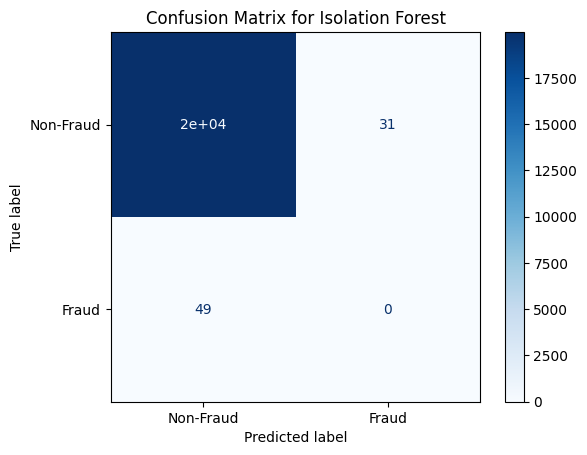

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_iso, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Isolation Forest')
plt.show()

Interpretation of Isolation Forest Results
Accuracy:
The overall accuracy is 99.60%, which appears high but is misleading due to poor fraud detection.
Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 19,970
False Positives (Non-Fraud misclassified as Fraud): 31
True Positives (Fraud correctly classified): 0
False Negatives (Fraud misclassified as Non-Fraud): 49
Precision for Fraud (1.0 class):
Precision is 0%, as the model failed to identify any fraud cases correctly.
Recall for Fraud (1.0 class):
Recall is 0%, meaning the model missed all 49 fraud cases.
Weighted Metrics:
The high accuracy is dominated by the model's excellent performance in detecting non-fraud cases but does not reflect its poor ability to identify fraud.

Key Observations:
High True Negative Rate: The model is very good at identifying non-fraud cases, which constitute the majority of the dataset.
No Fraud Detection: The model struggles entirely with detecting fraud cases, as evidenced by the zero true positives.
Class Imbalance Challenge: Like One-Class SVM, the model focuses on learning patterns in the majority class (non-fraud) but fails to generalize to the minority class (fraud).

The Isolation Forest model is not effective for this task, as it completely fails to detect fraud cases. This highlights the challenge of applying anomaly detection models like Isolation Forest to highly imbalanced datasets where the minority class (fraud) is critical.

In [ ]:
#K-Nearest Neighbors (KNN)

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,  # Number of neighbors to consider
    weights='distance',  # Weight neighbors by distance
    metric='minkowski',  # Distance metric (Euclidean distance)
    p=2  # Power parameter for Minkowski metric
)

In [ ]:
# Train the KNN model
knn_model.fit(X_train, y_train)


KNeighborsClassifier(weights='distance')

In [ ]:
# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)


In [ ]:
# Predict probabilities for ROC curve
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)


In [ ]:
# Print evaluation results
print("K-Nearest Neighbors (KNN) Results")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(class_report_knn)
print(f"AUC-ROC Score: {roc_auc_knn:.4f}")


K-Nearest Neighbors (KNN) Results
Accuracy: 0.9981
Confusion Matrix:
[[19995     6]
 [   32    17]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20001
         1.0       0.74      0.35      0.47        49

    accuracy                           1.00     20050
   macro avg       0.87      0.67      0.74     20050
weighted avg       1.00      1.00      1.00     20050

AUC-ROC Score: 0.7533


<Figure size 800x600 with 0 Axes>

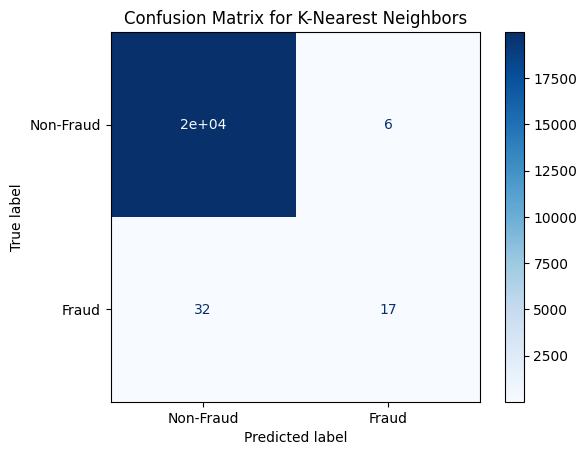

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

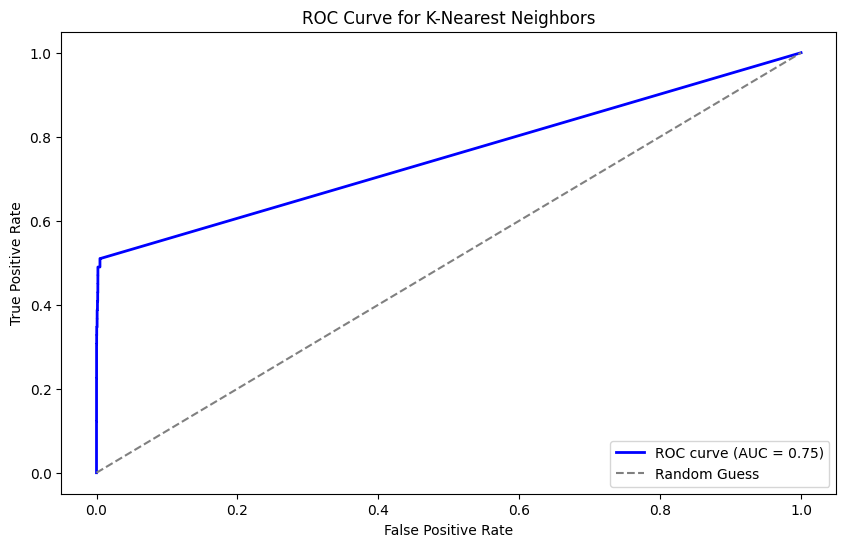

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

Interpretation of K-Nearest Neighbors (KNN) Results
Accuracy:
The overall accuracy is 99.81%, which reflects that the majority of the transactions are correctly classified.
Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 19,995
False Positives (Non-Fraud misclassified as Fraud): 6
True Positives (Fraud correctly classified): 17
False Negatives (Fraud misclassified as Non-Fraud): 32
Precision for Fraud (1.0 class):
Precision is 74%, meaning that when the model predicts fraud, it is correct 74% of the time.
Recall for Fraud (1.0 class):
Recall is 35%, indicating that the model identified 35% of actual fraud cases. It missed 32 fraud cases.
AUC-ROC Score:
The AUC-ROC score is 0.7533, which reflects a moderate ability of the model to separate fraudulent and non-fraudulent transactions.

Key Observations:
High True Negative Rate: The model is excellent at correctly identifying non-fraud cases, as seen from the high precision for the non-fraud class.
Moderate Fraud Detection: Although the precision for fraud detection is relatively good (74%), the recall (35%) is low, indicating many fraudulent cases are missed.
Overall Performance: The accuracy is high due to the dominance of non-fraud cases, but the AUC-ROC score suggests the model has room for improvement in distinguishing fraud from non-fraud.

we can Tune the n_neighbors Parameter:
Experiment with different values for n_neighbors to find the optimal number of neighbors for better fraud detection.
Feature Scaling:
Ensure the input features are normalized, as KNN relies heavily on distance calculations.
Class Balancing:
Use oversampling (e.g., SMOTE) or undersampling techniques to balance the dataset and improve recall for fraud detection.
Alternative Distance Metrics:
Experiment with other distance metrics like Manhattan (p=1) to see if they improve performance.

In [ ]:
#Autoencoders (Deep Learning

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Prepare the data
# Autoencoder is trained only on non-fraud cases (class 0)
X_train_auto = X_train[y_train == 0]
X_test_auto = X_test

In [ ]:
# Define the Autoencoder model
input_dim = X_train_auto.shape[1]
encoding_dim = 16  # Size of the encoding layer

In [ ]:
# Input layer
input_layer = Input(shape=(input_dim,))

In [ ]:
# Encoding layer
encoder = Dense(encoding_dim, activation="relu")(input_layer)

In [ ]:
# Decoding layer
decoder = Dense(input_dim, activation="sigmoid")(encoder)

In [ ]:
# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)


In [ ]:
# Compile the model
autoencoder.compile(optimizer="adam", loss="mean_squared_error")


In [ ]:
# Train the autoencoder
history = autoencoder.fit(
    X_train_auto, X_train_auto,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4508114485248.0000 - val_loss: 4592428908544.0000
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 4551703265280.0000 - val_loss: 4592428908544.0000
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4501069627392.0000 - val_loss: 4592428908544.0000
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4531407552512.0000 - val_loss: 4592428908544.0000
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4551343603712.0000 - val_loss: 4592428908544.0000
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4553087385600.0000 - val_loss: 4592428908544.0000
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4576641024000.0000 - val_loss: 4592428908544.0000
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4555497013248.0000 - val_loss: 4592428908544.0000
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4577819623424.0000 - val_loss: 4592428908544.0000
Epoch 10/2

In [ ]:
# Predict reconstruction errors for the test set
X_test_reconstructed = autoencoder.predict(X_test_auto)
reconstruction_error = np.mean(np.power(X_test_auto - X_test_reconstructed, 2), axis=1)


627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
# Set a threshold for reconstruction error (use the 95th percentile of non-fraud errors)
threshold = np.percentile(reconstruction_error[y_test == 0], 95)

In [ ]:
# Classify fraud based on the threshold
y_pred_auto = (reconstruction_error > threshold).astype(int)

In [ ]:
# Evaluate the model
accuracy_auto = accuracy_score(y_test, y_pred_auto)
conf_matrix_auto = confusion_matrix(y_test, y_pred_auto)
class_report_auto = classification_report(y_test, y_pred_auto)


In [ ]:
# Compute ROC curve and AUC
fpr_auto, tpr_auto, thresholds_auto = roc_curve(y_test, reconstruction_error)
roc_auc_auto = auc(fpr_auto, tpr_auto)


In [ ]:
# Print evaluation results
print("Autoencoder Results")
print(f"Accuracy: {accuracy_auto:.4f}")
print("Confusion Matrix:")
print(conf_matrix_auto)
print("\nClassification Report:")
print(class_report_auto)
print(f"AUC-ROC Score: {roc_auc_auto:.4f}")

Autoencoder Results
Accuracy: 0.9477
Confusion Matrix:
[[19001  1000]
 [   48     1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     20001
         1.0       0.00      0.02      0.00        49

    accuracy                           0.95     20050
   macro avg       0.50      0.49      0.49     20050
weighted avg       1.00      0.95      0.97     20050

AUC-ROC Score: 0.3825


<Figure size 800x600 with 0 Axes>

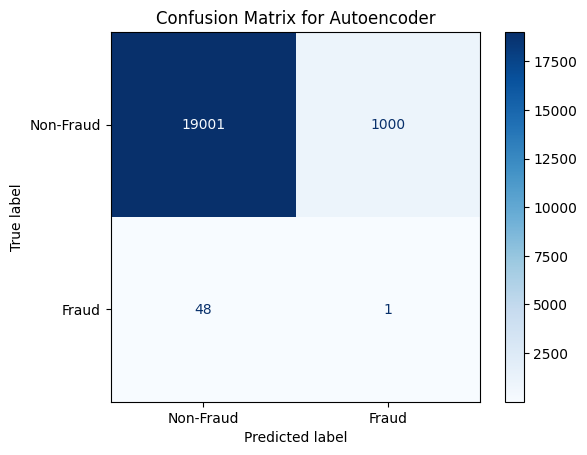

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_auto, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Autoencoder')
plt.show()

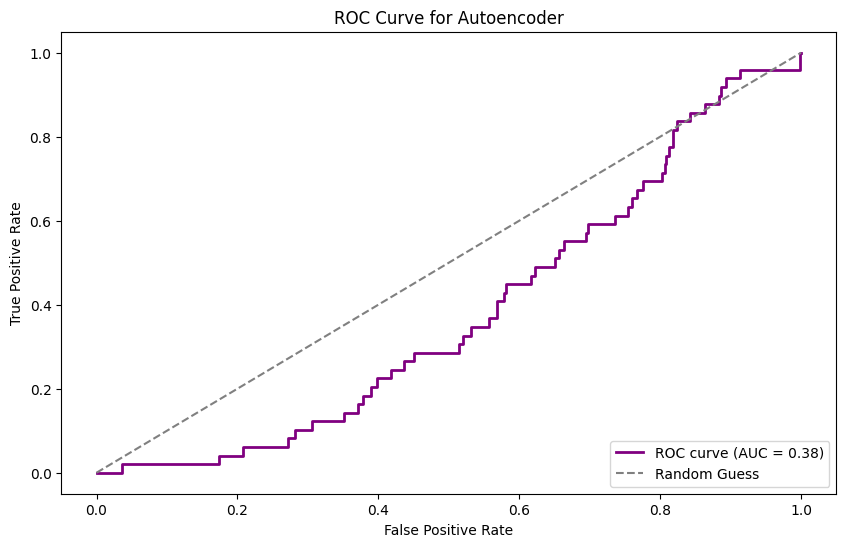

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_auto, tpr_auto, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_auto:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Autoencoder')
plt.legend(loc='lower right')
plt.show()

Interpretation of Autoencoder Results
Accuracy:
The model achieved 94.77% accuracy, which reflects its strong performance on non-fraudulent transactions, but this metric is skewed due to the imbalance in the dataset.
Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 19,001
False Positives (Non-Fraud misclassified as Fraud): 1,000
True Positives (Fraud correctly classified): 1
**False Negatives (Fraud misclassified
as Non-Fraud):** 48

Precision for Fraud (1.0 class):
Precision is 0%, indicating the model is unable to correctly classify fraud cases as fraud.
Recall for Fraud (1.0 class):
Recall is 2%, meaning the model identifies only 2% of the actual fraud cases.
AUC-ROC Score:
The AUC-ROC score is 0.3825, which is significantly below acceptable levels, indicating that the model struggles to distinguish between fraudulent and non-fraudulent transactions.

Key Observations:
The Autoencoder successfully reconstructs non-fraudulent transactions but struggles significantly with fraud detection, misclassifying almost all fraud cases as non-fraud.
The AUC-ROC score indicates the Autoencoder does not effectively separate the two classes.

Smote

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Compute class weights (optional with SMOTE but included for completeness)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights = dict(enumerate(class_weights))

# Build the fine-tuned Neural Network model
model_tuned = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_tuned.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the SMOTE-resampled data
history_tuned = model_tuned.fit(
    X_train_scaled, y_train_smote,
    validation_data=(X_test_scaled, y_test),
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
15859/15859 ━━━━━━━━━━━━━━━━━━━━ 104s 6ms/step - accuracy: 0.9682 - loss: 0.0784 - val_accuracy: 0.9718 - val_loss: 0.0609
Epoch 2/10
15859/15859 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - accuracy: 0.9698 - loss: 0.0750 - val_accuracy: 0.9754 - val_loss: 0.0568
Epoch 3/10
15859/15859 ━━━━━━━━━━━━━━━━━━━━ 143s 6ms/step - accuracy: 0.9714 - loss: 0.0712 - val_accuracy: 0.9780 - val_loss: 0.0478
Epoch 4/10
15859/15859 ━━━━━━━━━━━━━━━━━━━━ 139s 5ms/step - accuracy: 0.9718 - loss: 0.0703 - val_accuracy: 0.9678 - val_loss: 0.0673
Epoch 5/10
15859/15859 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - accuracy: 0.9730 - loss: 0.0679 - val_accuracy: 0.9654 - val_loss: 0.0815
Epoch 6/10
15859/15859 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - accuracy: 0.9744 - loss: 0.0648 - val_accuracy: 0.9787 - val_loss: 0.0442
Epoch 7/10
15859/15859 ━━━━━━━━━━━━━━━━━━━━ 139s 5ms/step - accuracy: 0.9747 - loss: 0.0642 - val_accuracy: 0.9655 - val_loss: 0.0724
Epoch 8/10
15859/15859 ━━━━━━━━━━━━━━━━━━━━ 143s 5ms/step - accu

In [ ]:
# Predict on the test set
y_prob_tuned = model_tuned.predict(X_test_scaled).ravel()
y_pred_tuned = (y_prob_tuned > 0.5).astype(int)

# Evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

3967/3967 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step


In [ ]:
# Print evaluation results
print("Neural Network Results with SMOTE")
print(f"Accuracy: {accuracy_tuned:.4f}")
print("Confusion Matrix:")
print(conf_matrix_tuned)
print("\nClassification Report:")
print(class_report_tuned)
print(f"AUC-ROC Score: {roc_auc_tuned:.4f}")

Neural Network Results with SMOTE
Accuracy: 0.9716
Confusion Matrix:
[[123279   3591]
 [     9     40]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    126870
         1.0       0.01      0.82      0.02        49

    accuracy                           0.97    126919
   macro avg       0.51      0.89      0.50    126919
weighted avg       1.00      0.97      0.99    126919

AUC-ROC Score: 0.9574


Confusion Matrix:
[[123279   3591]
 [     9     40]]


<Figure size 800x600 with 0 Axes>

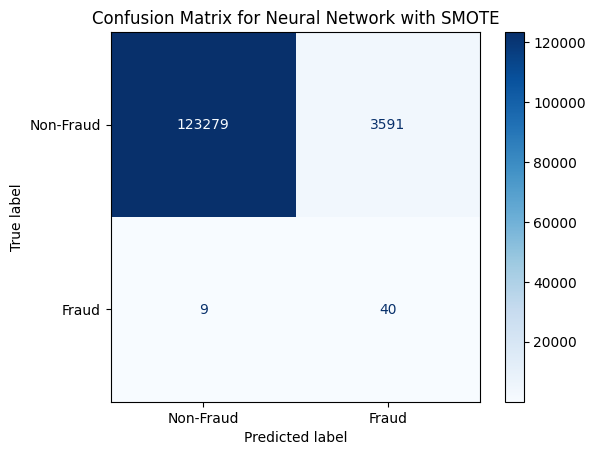

In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_tuned)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_tuned,
    display_labels=['Non-Fraud', 'Fraud'],
    cmap='Blues'
)
plt.title('Confusion Matrix for Neural Network with SMOTE')
plt.show()


XGBoost Results with SMOTE
Accuracy: 0.8883
Confusion Matrix:
[[112698  14172]
 [     4     45]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94    126870
         1.0       0.00      0.92      0.01        49

    accuracy                           0.89    126919
   macro avg       0.50      0.90      0.47    126919
weighted avg       1.00      0.89      0.94    126919

AUC-ROC Score: 0.9541


<Figure size 800x600 with 0 Axes>

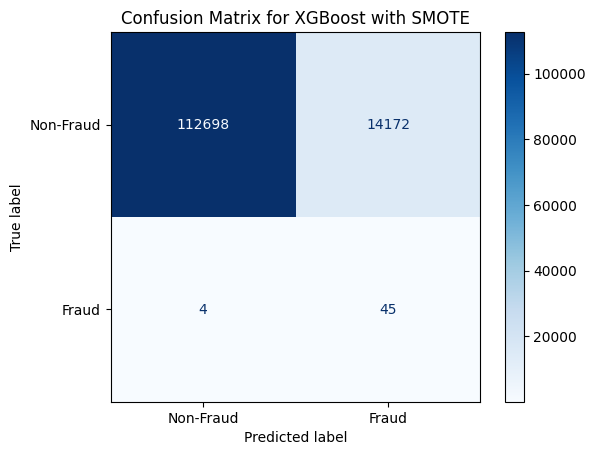

Text(0.5, 0, 'False Positive Rate')

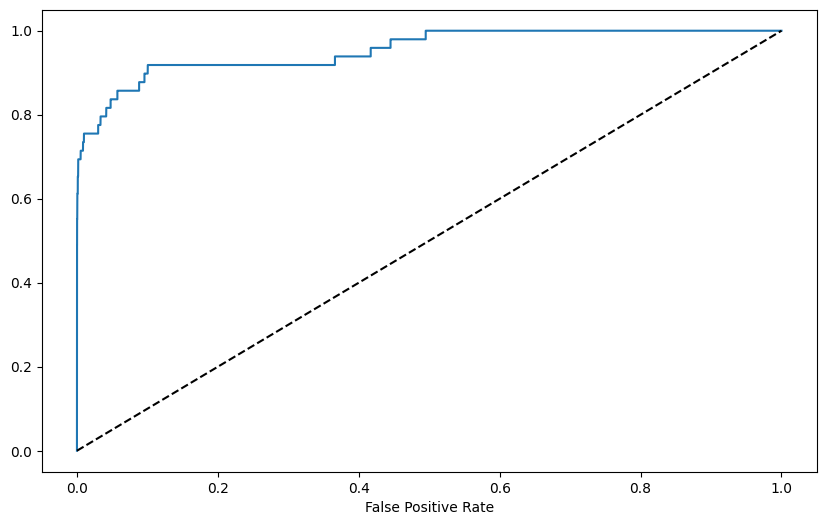

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # Optional, SMOTE already balances
)

# Train the XGBoost model
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_prob_xgb > 0.5).astype(int)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Print evaluation results
print("XGBoost Results with SMOTE")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)
print(f"AUC-ROC Score: {roc_auc_xgb:.4f}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_xgb,
    display_labels=['Non-Fraud', 'Fraud'],
    cmap='Blues'
)
plt.title('Confusion Matrix for XGBoost with SMOTE')
plt.show()

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Print evaluation results
print("Random Forest Results with SMOTE")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)
print(f"AUC-ROC Score: {roc_auc_rf:.4f}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    display_labels=['Non-Fraud', 'Fraud'],
    cmap='Blues'
)
plt.title('Confusion Matrix for Random Forest with SMOTE')
plt.show()

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest with SMOTE')
plt.legend(loc='lower right')
plt.show()


Confusion Matrix:
[[126818     52]
 [    24     25]]


<Figure size 800x600 with 0 Axes>

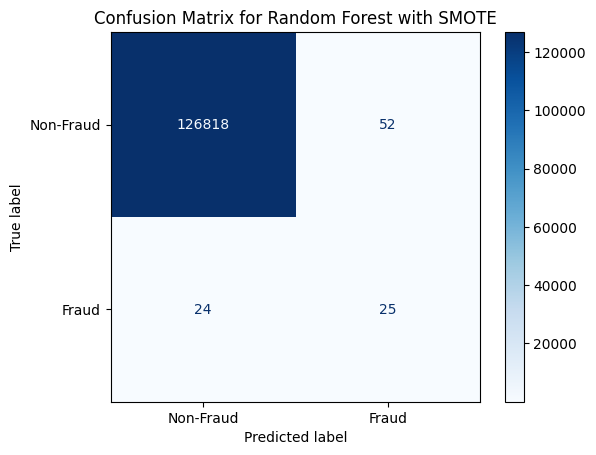

In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    display_labels=['Non-Fraud', 'Fraud'],
    cmap='Blues'
)
plt.title('Confusion Matrix for Random Forest with SMOTE')
plt.show()


Logistic Regression Results with SMOTE
Accuracy: 0.9367
Confusion Matrix:
[[118838   8032]
 [     8     41]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    126870
         1.0       0.01      0.84      0.01        49

    accuracy                           0.94    126919
   macro avg       0.50      0.89      0.49    126919
weighted avg       1.00      0.94      0.97    126919

AUC-ROC Score: 0.9500


<Figure size 800x600 with 0 Axes>

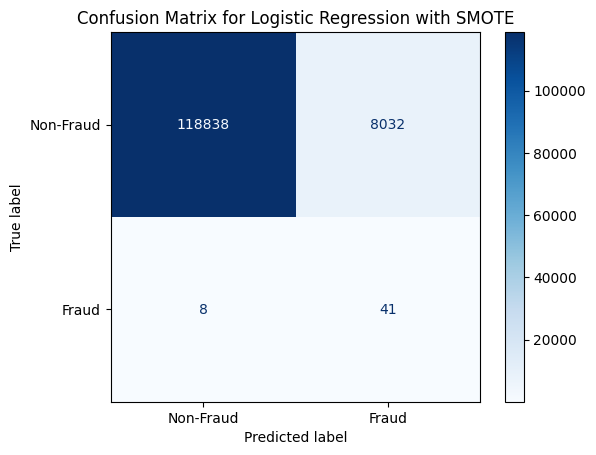

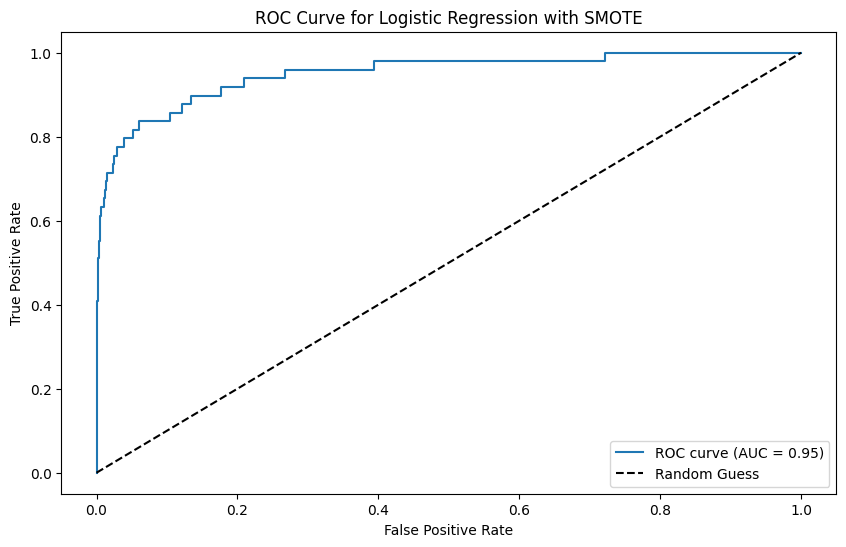

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logreg_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Print evaluation results
print("Logistic Regression Results with SMOTE")
print(f"Accuracy: {accuracy_logreg:.4f}")
print("Confusion Matrix:")
print(conf_matrix_logreg)
print("\nClassification Report:")
print(class_report_logreg)
print(f"AUC-ROC Score: {roc_auc_logreg:.4f}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_logreg,
    display_labels=['Non-Fraud', 'Fraud'],
    cmap='Blues'
)
plt.title('Confusion Matrix for Logistic Regression with SMOTE')
plt.show()

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'ROC curve (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with SMOTE')
plt.legend(loc='lower right')
plt.show()
